#**EB 3204 Pembelajaran Mesin dalam Teknik Biomedis | Tugas 2**
13522053 - Erdianti Wiga Putri Andini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from mlxtend.plotting import plot_decision_regions
from IPython.display import Image, display
from sklearn import __version__ as sklearn_version
from distutils.version import LooseVersion as Version

import warnings
warnings.filterwarnings('ignore')
# !pip install gspread pandas

##**Import Data**

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1XgPJb1-SlIWcnDRij09xF_-vXYCi9kY4QgypUqRjvew/edit?usp=sharing')
sheet = wb.worksheet('Form Responses 1')
data = sheet.get_all_values()

df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.iloc[:, 3:].reset_index(drop=True)
df.head()

0         Nama Mata Kuliah Jumlah SKS      Nilai Jenis kelamin mahasiswa  \
0          Fisika Dasar IA          4  A atau AB               Laki-laki   
1                Olah Raga          2  A atau AB               Laki-laki   
2  Tata Tulis Karya Ilmiah          2  A atau AB               Laki-laki   
3           Bahasa Inggris          2  A atau AB               Laki-laki   
4     Pengenalan Komputasi          3  A atau AB               Laki-laki   

0 Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)  \
0                                                  3                                      
1                                                  3                                      
2                                                  3                                      
3                                                  3                                      
4                                                  3                                      

0 Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)  \
0                                                  5                                                   
1                                                  2                                                   
2                                                  3                                                   
3                                                  3                                                   
4                                                  5                                                   

0 Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)  \
0                                                  4                                       
1                                                  2                                       
2                                                  3                                       
3                                                  3                                       
4                                                  4                                       

0                                 Komponen Nilai Pelaksanaan kuliah  \
0  Ada PR, Ada Kuis, Ada Tubes, Ada UTS, Ada UAS             Luring   
1                               Ada UTS, Ada UAS             Luring   
2                    Ada Tubes, Ada UTS, Ada UAS             Luring   
3                    Ada Tubes, Ada UTS, Ada UAS             Luring   
4                    Ada Tubes, Ada UTS, Ada UAS             Luring   

0 Lama belajar per minggu Total SKS yang diambil saat mengambil kuliah ini  \
0                       6                                               17   
1                       5                                               17   
2                       3                                               17   
3                       4                                               17   
4                       5                                               17   

0 Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)  \
0                                                  5                      
1                                                  3                      
2                                                  3                      
3                                                  4                      
4                                                  3                      

0 Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)  \
0                                                  3                          
1                                                  2                          
2                                                  3                          
3                                                  4                          
4                                                  4                        

##**EDA**

In [ ]:
print("Informasi Dataset:")
df.info()
print("\nInformasi Statistik Features:")
df.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 14 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   Nama Mata Kuliah                                                                                    815 non-null    object
 1   Jumlah SKS                                                                                          815 non-null    object
 2   Nilai                                                                                               815 non-null    object
 3   Jenis kelamin mahasiswa                                                                             815 non-null    object
 4   Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)               815

0                 Nama Mata Kuliah Jumlah SKS      Nilai  \
count                          815        815        815   
unique                         205          4          4   
top     Pemecahan Masalah dengan C          3  A atau AB   
freq                            26        340        520   

0      Jenis kelamin mahasiswa  \
count                      815   
unique                       2   
top                  Perempuan   
freq                       425   

0      Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)  \
count                                                 815                                      
unique                                                  5                                      
top                                                     3                                      
freq                                                  315                                      

0      Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)  \
count                                                 815                                                   
unique                                                  5                                                   
top                                                     3                                                   
freq                                                  250                                                   

0      Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)  \
count                                                 815                                       
unique                                                  5                                       
top                                                     4                                       
freq                                                  314                                       

0                           Komponen Nilai Pelaksanaan kuliah  \
count                                  815                815   
unique                                  22                  7   
top     Ada PR, Ada Kuis, Ada UTS, Ada UAS             Luring   
freq                                   181                624   

0      Lama belajar per minggu  \
count                      815   
unique                      10   
top                          2   
freq                       153   

0      Total SKS yang diambil saat mengambil kuliah ini  \
count                                               815   
unique                                               18   
top                                                  19   
freq                                                207   

0      Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)  \
count                                                 815                      
unique                                                  5                      
top                                                     5                      
freq                                                  275                      

0      Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)  \
count                                                 815                          
unique                                                  5                          
top                                                     3                          
freq                                                  274                          

0      Tingkat Kehadiran, skala 1 sd 3 (1 rendah, 2 sedang, 3 tinggi)  
count                                                 815              
unique                                                  3              
top                                                     3              
freq                                                  574

In [ ]:
# Cek missing values

print("\nJumlah Missing Values:")
df.isnull().sum()


Jumlah Missing Values:


0
Nama Mata Kuliah                                                                                      0
Jumlah SKS                                                                                            0
Nilai                                                                                                 0
Jenis kelamin mahasiswa                                                                               0
Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)                 0
Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)    0
Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)                0
Komponen Nilai                                                                                        0
Pelaksanaan kuliah                                                                                    0
Lama belajar per minggu                                                                               0
Total SKS yang diambil saat mengambil kuliah ini                                                      0
Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)                                 0
Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)                             0
Tingkat Kehadiran, skala 1 sd 3 (1 rendah, 2 sedang, 3 tinggi)                                        0
dtype: int64

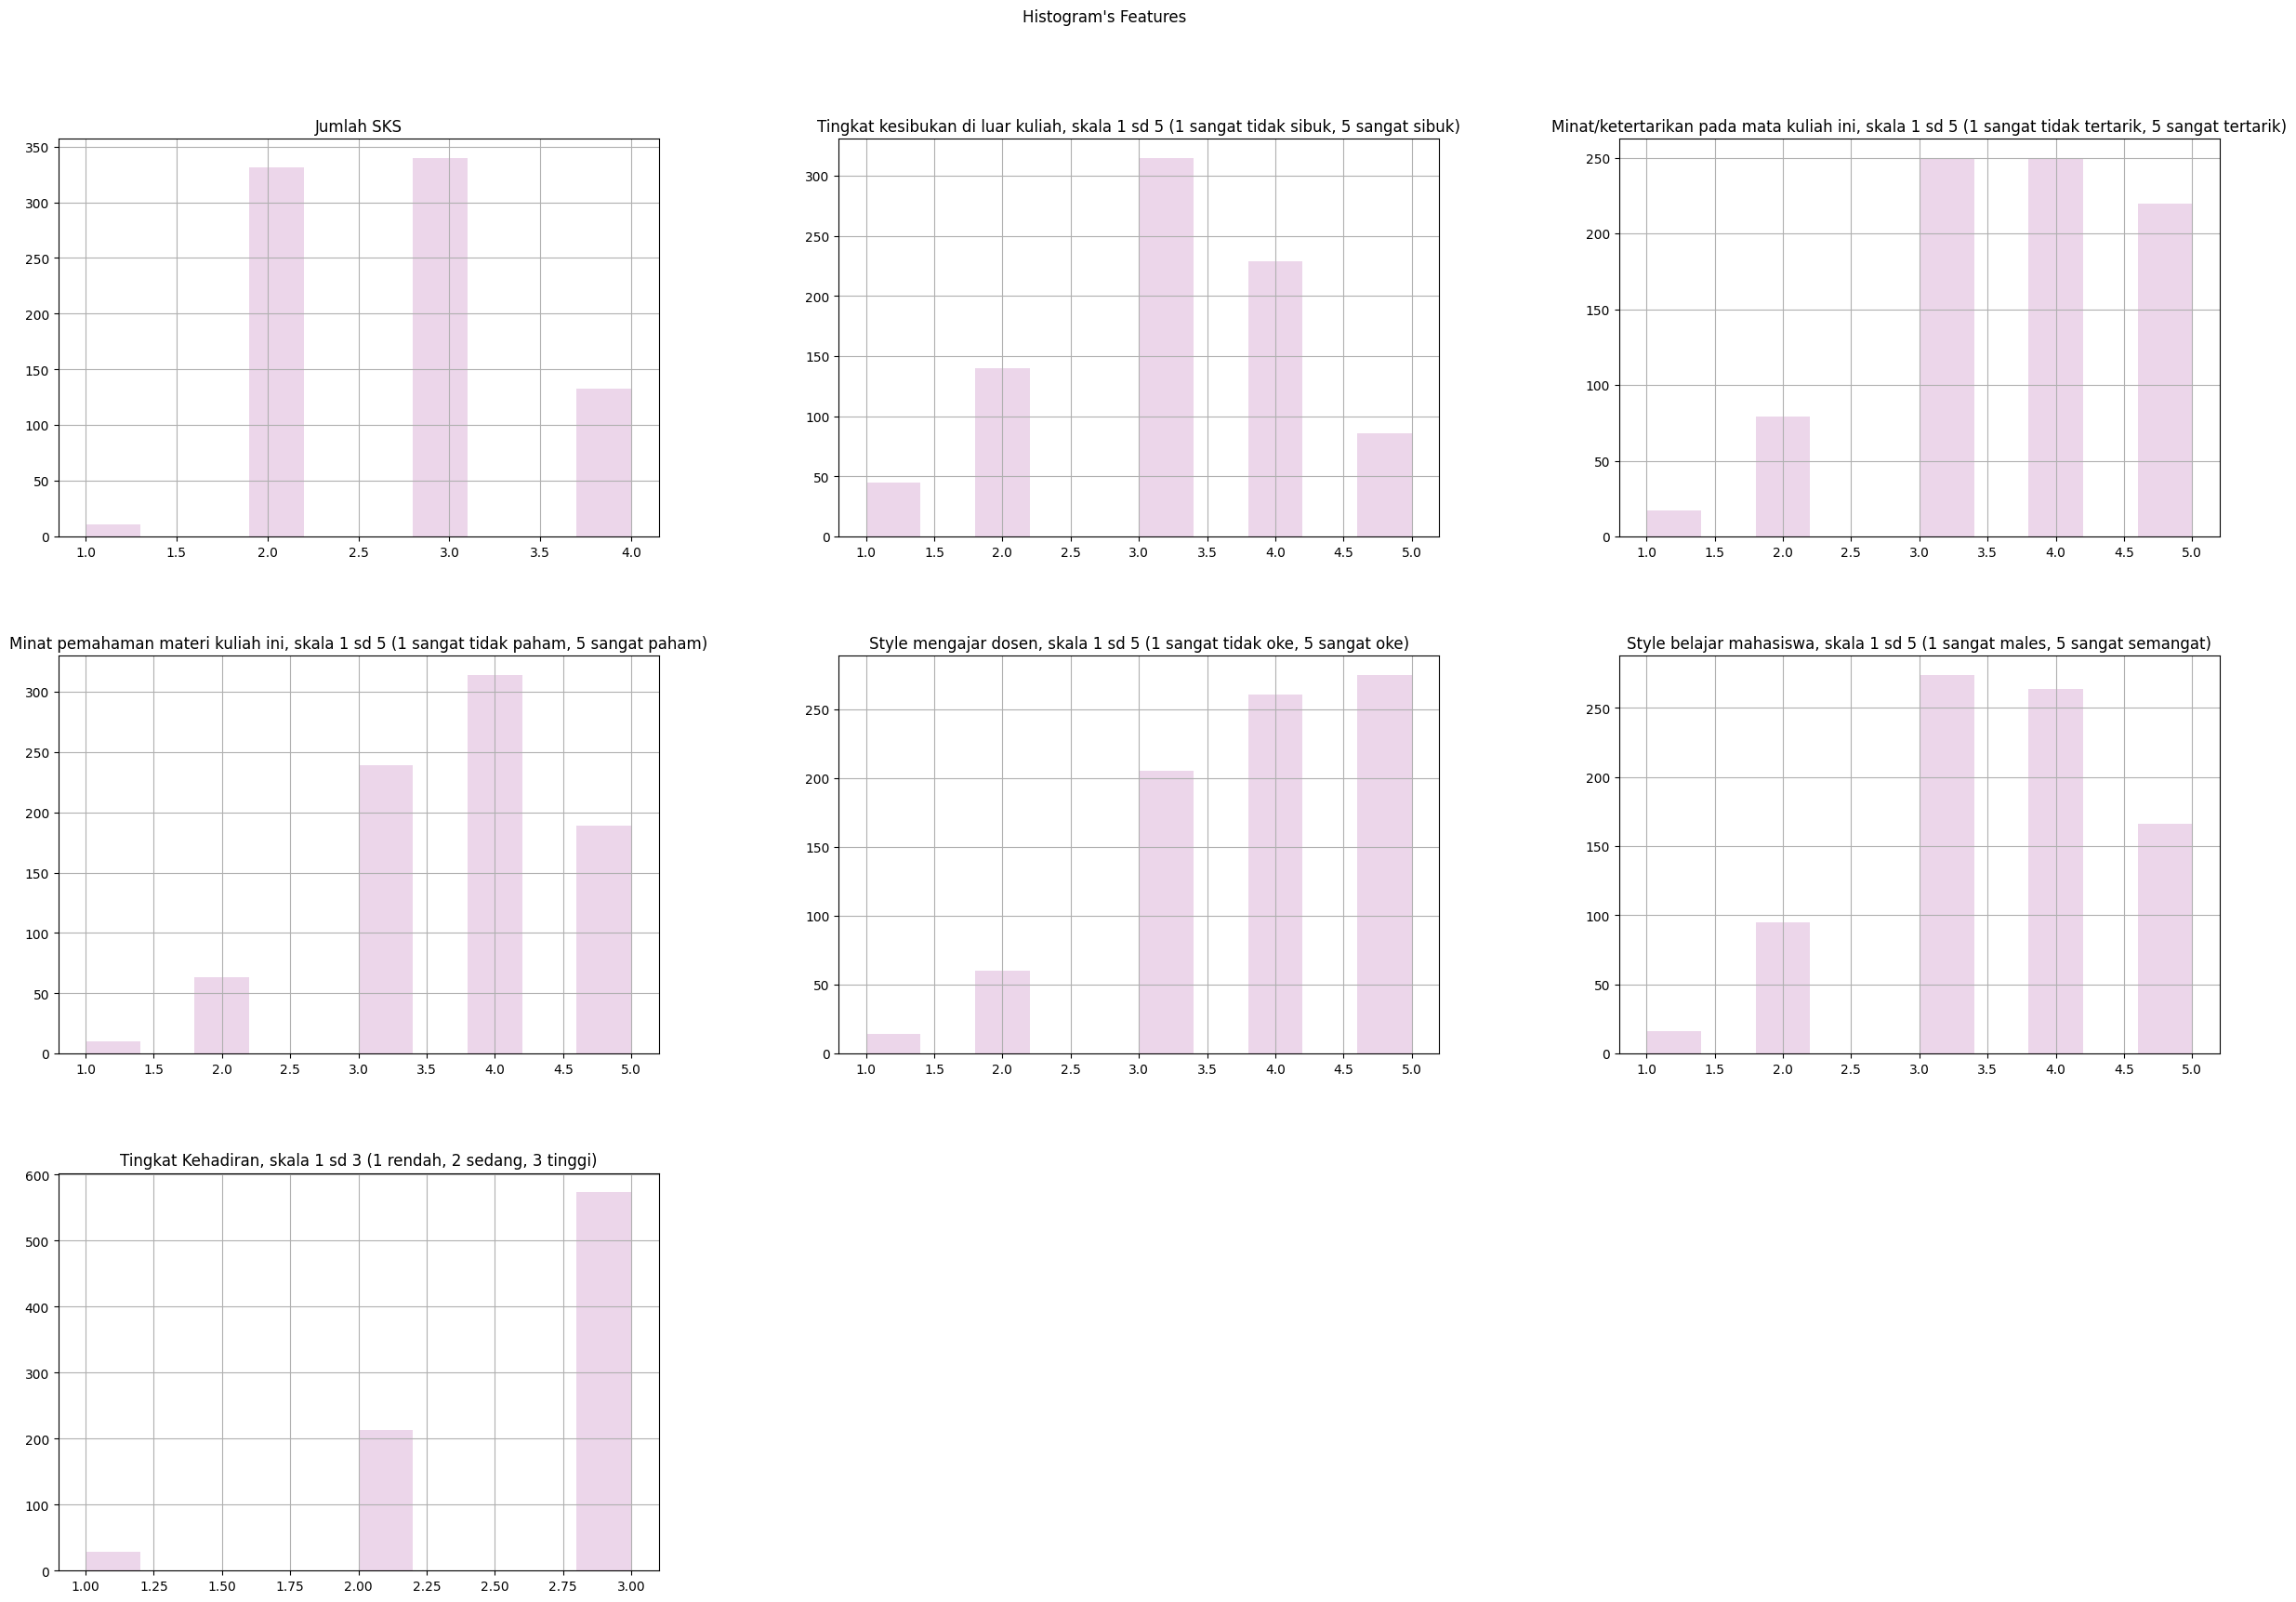

In [ ]:
# Convert column yg angka doang jd numerik
numerical_columns = [
    'Jumlah SKS',
    'Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)',
    'Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)',
    'Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)',
    'Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)',
    'Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)',
    'Tingkat Kehadiran, skala 1 sd 3 (1 rendah, 2 sedang, 3 tinggi)'
]

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Gantilah nilai yang tidak bisa diubah menjadi NaN

df['Jumlah SKS'] = pd.to_numeric(df['Jumlah SKS'], errors='coerce')

# Plot histogram just for numerik
df[numerical_columns].hist(figsize=(30, 20), color='#ECD6EA')
plt.suptitle("Histogram's Features", y=0.95)
plt.show()


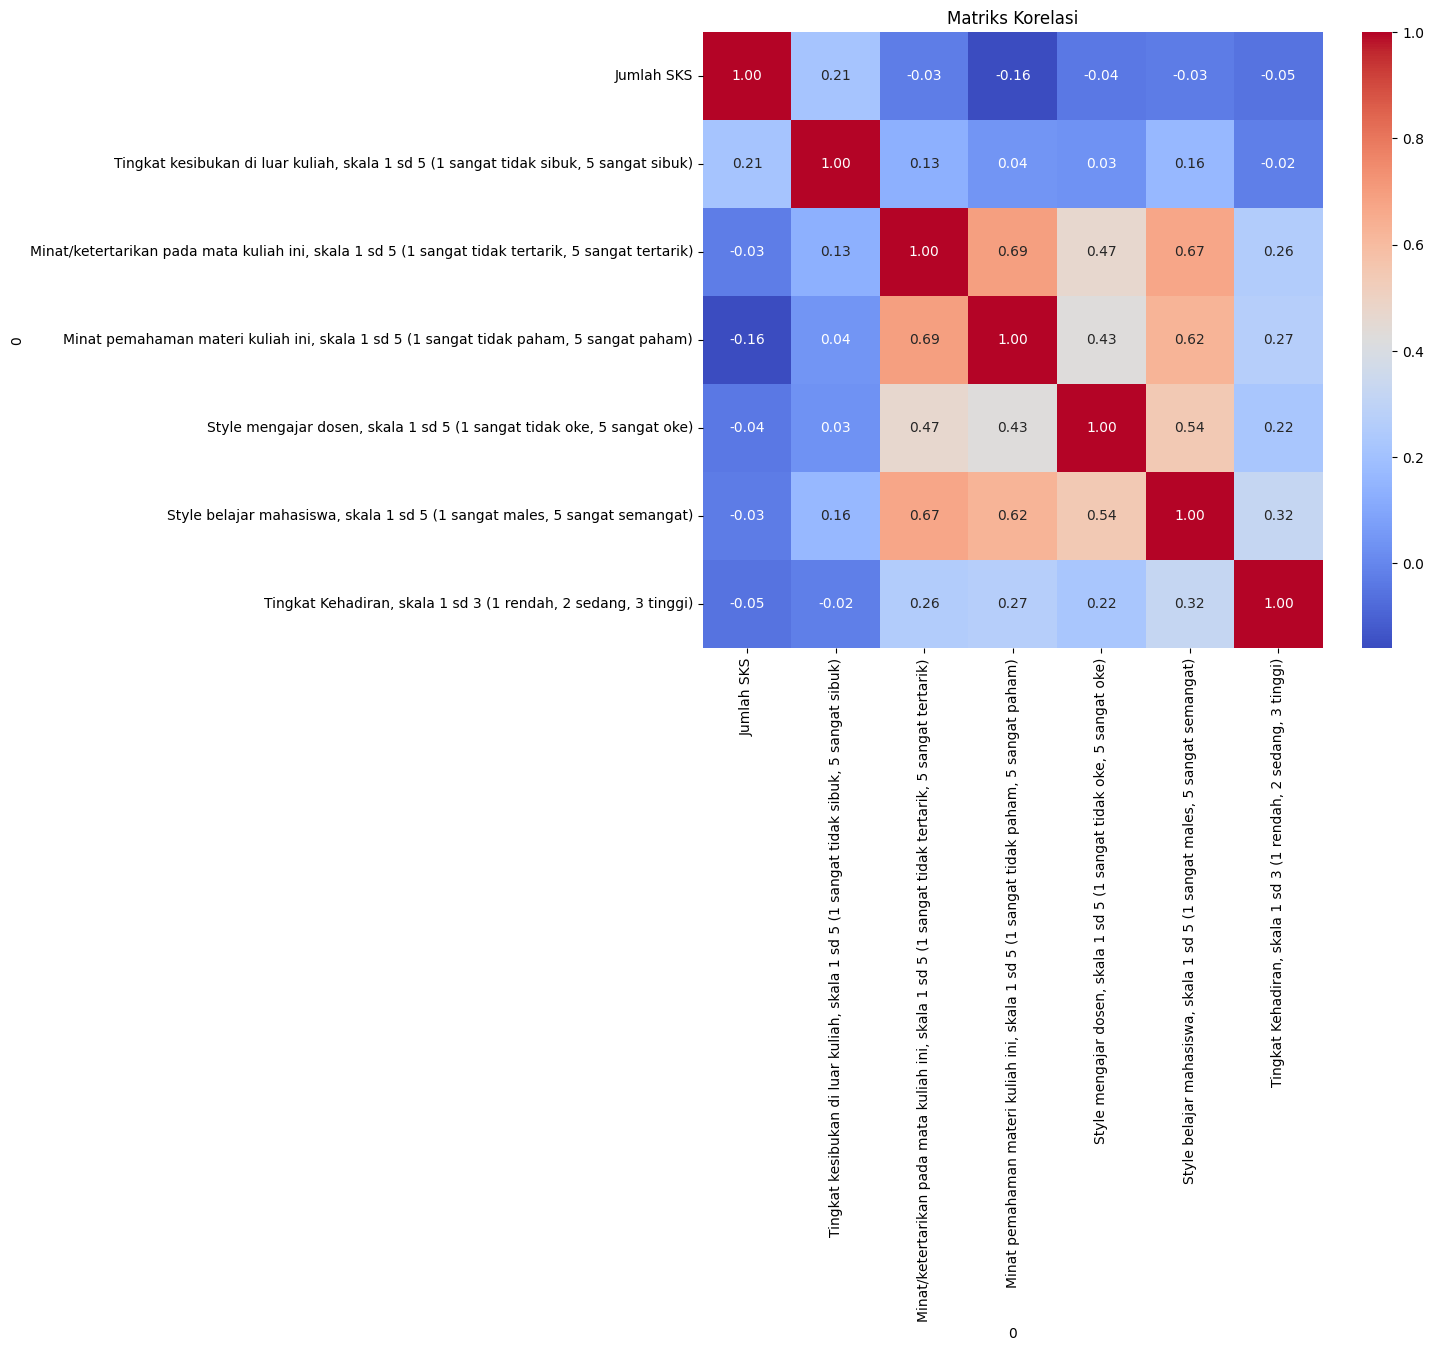

In [ ]:
# Correlation Matrix

plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
nilai_mapping = {
    'A atau AB': 4.0,
    'B atau BC': 3.0,
    'C atau D': 2.0,
    'E atau T': 1.0
}
nilai_mapping

{'A atau AB': 4.0, 'B atau BC': 3.0, 'C atau D': 2.0, 'E atau T': 1.0}

In [ ]:
df_ml = df.copy()
df_ml['Nilai_Numeric'] = df_ml['Nilai'].map(nilai_mapping)

df_ml.head()

0         Nama Mata Kuliah  Jumlah SKS      Nilai Jenis kelamin mahasiswa  \
0          Fisika Dasar IA           4  A atau AB               Laki-laki   
1                Olah Raga           2  A atau AB               Laki-laki   
2  Tata Tulis Karya Ilmiah           2  A atau AB               Laki-laki   
3           Bahasa Inggris           2  A atau AB               Laki-laki   
4     Pengenalan Komputasi           3  A atau AB               Laki-laki   

0  Tingkat kesibukan di luar kuliah, skala 1 sd 5 (1 sangat tidak sibuk, 5 sangat sibuk)  \
0                                                  3                                       
1                                                  3                                       
2                                                  3                                       
3                                                  3                                       
4                                                  3                                       

0  Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)  \
0                                                  5                                                    
1                                                  2                                                    
2                                                  3                                                    
3                                                  3                                                    
4                                                  5                                                    

0  Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)  \
0                                                  4                                        
1                                                  2                                        
2                                                  3                                        
3                                                  3                                        
4                                                  4                                        

0                                 Komponen Nilai Pelaksanaan kuliah  \
0  Ada PR, Ada Kuis, Ada Tubes, Ada UTS, Ada UAS             Luring   
1                               Ada UTS, Ada UAS             Luring   
2                    Ada Tubes, Ada UTS, Ada UAS             Luring   
3                    Ada Tubes, Ada UTS, Ada UAS             Luring   
4                    Ada Tubes, Ada UTS, Ada UAS             Luring   

0 Lama belajar per minggu Total SKS yang diambil saat mengambil kuliah ini  \
0                       6                                               17   
1                       5                                               17   
2                       3                                               17   
3                       4                                               17   
4                       5                                               17   

0  Style mengajar dosen, skala 1 sd 5 (1 sangat tidak oke, 5 sangat oke)  \
0                                                  5                       
1                                                  3                       
2                                                  3                       
3                                                  4                       
4                                                  3                       

0  Style belajar mahasiswa, skala 1 sd 5 (1 sangat males, 5 sangat semangat)  \
0                                                  3                           
1                                                  2                           
2                                                  3                           
3                                                  4                           
4                                        

In [ ]:
features_to_drop = ['Nama Mata Kuliah', 'Nilai']
X = df_ml.drop(features_to_drop + ['Nilai_Numeric'], axis=1)

# Encoding untuk Komponen Nilai
X['Ada_PR'] = X['Komponen Nilai'].str.contains('PR').astype(int)
X['Ada_Kuis'] = X['Komponen Nilai'].str.contains('Kuis').astype(int)
X['Ada_Tubes'] = X['Komponen Nilai'].str.contains('Tubes').astype(int)
X['Ada_UTS'] = X['Komponen Nilai'].str.contains('UTS').astype(int)
X['Ada_UAS'] = X['Komponen Nilai'].str.contains('UAS').astype(int)

X['Jumlah_Komponen_Nilai'] = X['Komponen Nilai'].apply(lambda x: len([item for item in ['PR', 'Kuis', 'Tubes', 'UTS', 'UAS'] if item in x]))

# One-hot encoding untuk Pelaksanaan Kuliah
X = pd.get_dummies(X, columns=['Pelaksanaan kuliah'], drop_first=False)

# Hapus kolom asli Komponen Nilai setelah encoding
X = X.drop('Komponen Nilai', axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

y = df_ml['Nilai_Numeric']

# X.head()
# X_encoded.head()

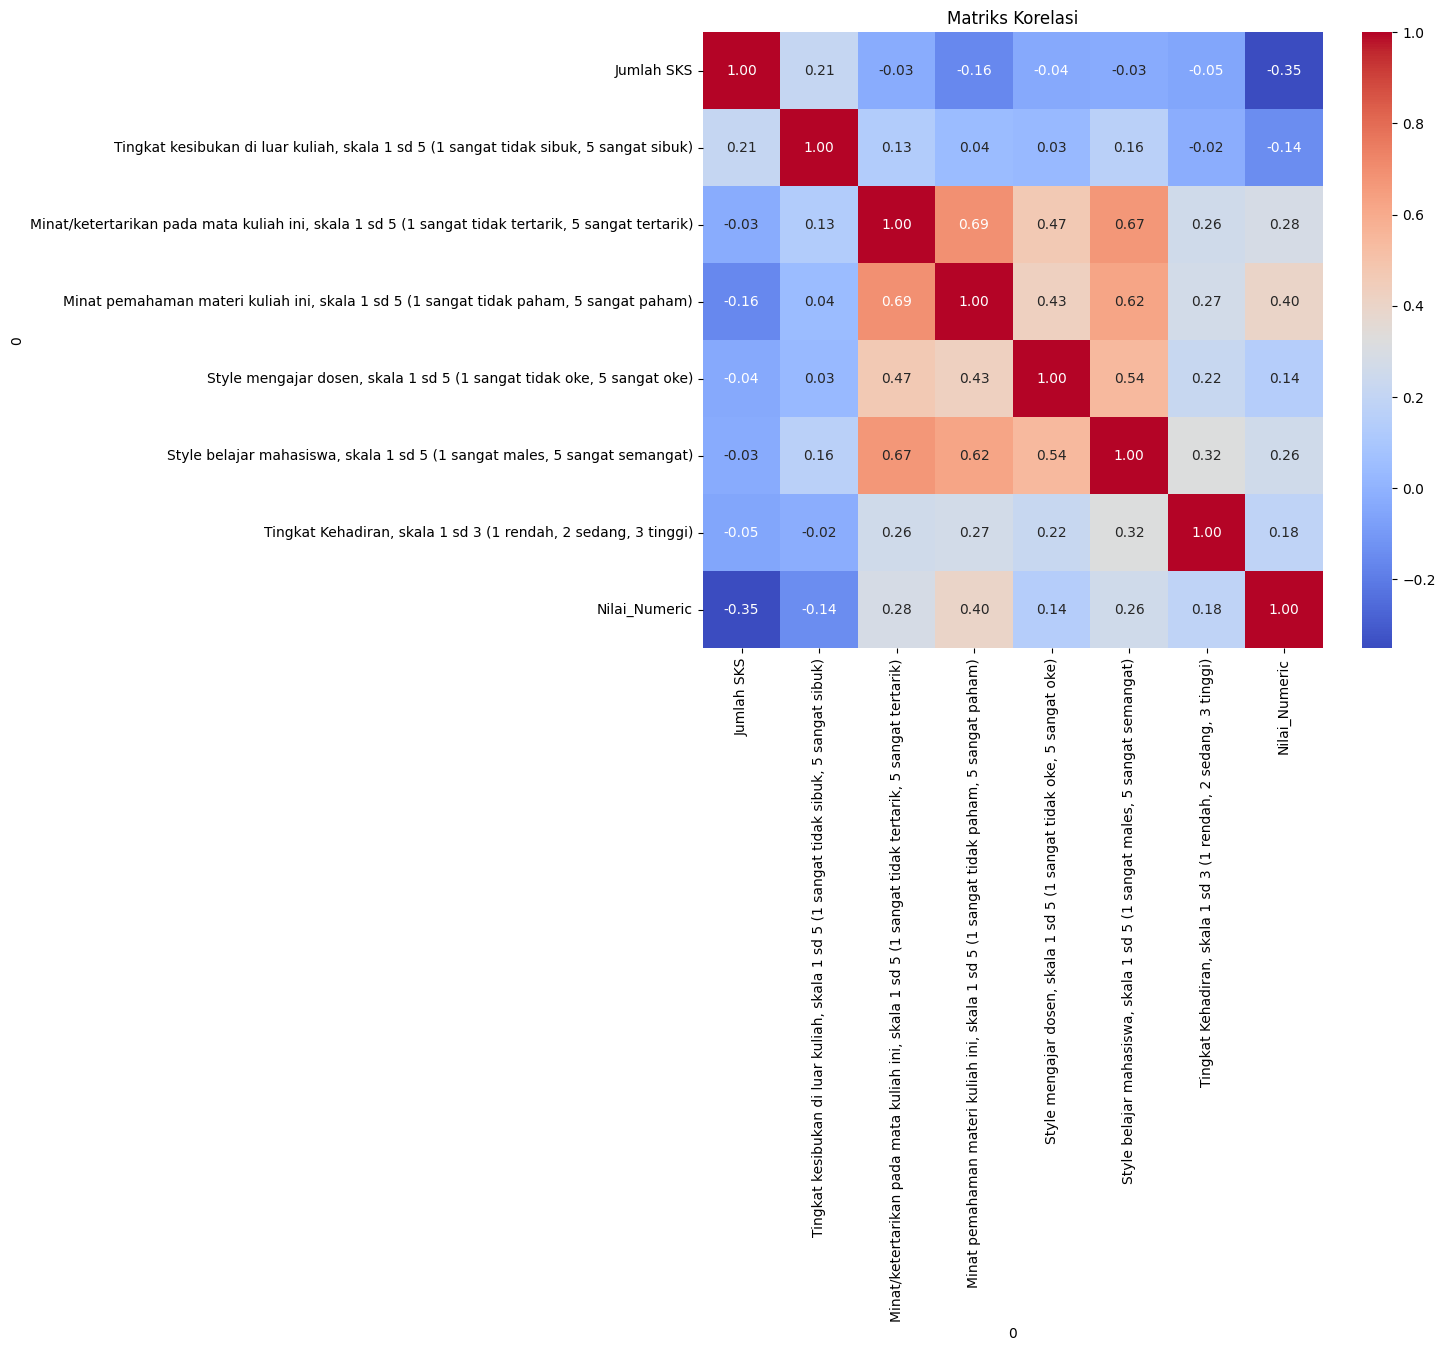

In [ ]:
# Correlation Matrix

plt.figure(figsize=(10, 8))
corr_matrix = df_ml.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
# # Cek correlations sama Nilai
# numeric_cols = df_ml.select_dtypes(include=[np.number]).columns
# corr_matrix = df_ml[numeric_cols].corr()
# corr_with_nilai = corr_matrix['Nilai_Numeric'].sort_values(ascending=False)
# print("Correlations with Nilai_Numeric:")
# print(corr_with_nilai)

# # Visualize correlations
# plt.figure(figsize=(10, 6))
# corr_with_nilai[1:10].plot(kind='bar', color='#ECD6EA')  # Exclude Nilai_Numeric
# plt.title('Feature Correlations with Grade')
# plt.ylabel('Correlation Coefficient')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

##**Soal**

###1. Pilih kira-kira 2 buah input yang menurut anda paling penting dan lakukan semua metode machine learning di ch03 terhadap data di atas. Buat analisa anda, mana yang metode yang menurut anda paling tepat?

Input yang dipilih adalah
- Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)
-  Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)

Alasan memilih input ini adalah karena pada correlation matrix di atas, korelasi **minat pemahaman materi terhadap nilai_numeric paling tinggi yaitu 0.40**. Diikuti dengan korelasi **minat/ketertarikan terhadap nilai_numeric sebesar 0.28**.

In [ ]:
# Prepare data
top_features = ['Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)',
                'Minat/ketertarikan pada mata kuliah ini, skala 1 sd 5 (1 sangat tidak tertarik, 5 sangat tertarik)']

X_selected = df_ml[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Combined data for visualization
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

y = y.astype(np.int_)
y_train = y_train.astype(np.int_)
y_test = y_test.astype(np.int_)
y_combined = y_combined.astype(np.int_)

####**Perceptron**


Perceptron Results:
Accuracy: 0.5951
F1 Score: 0.5686
5-Fold CV Accuracy: 0.5276
Misclassified samples: 66


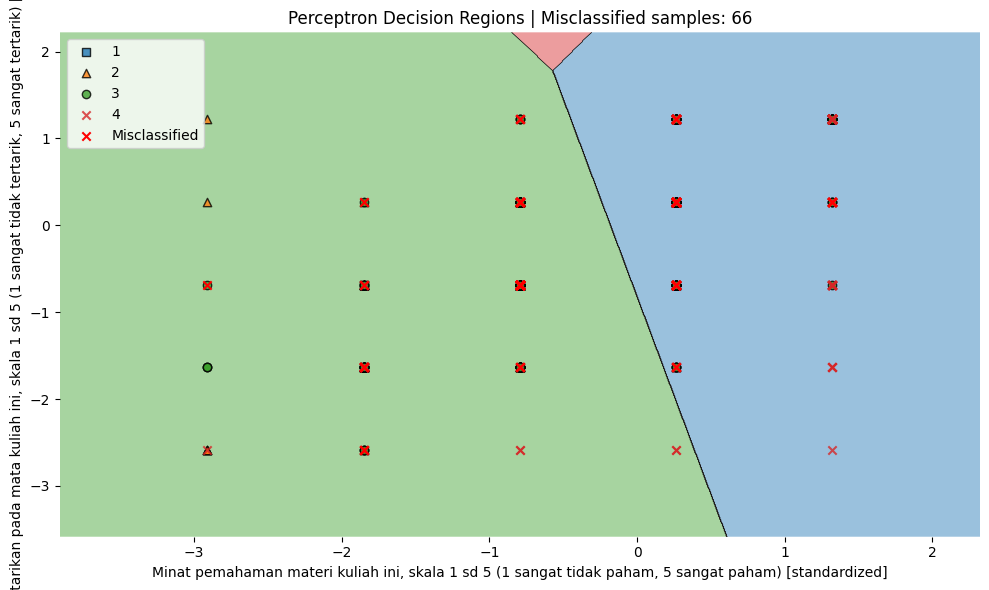

In [ ]:
# ====================== Perceptron ======================
ppn = Perceptron(random_state=42)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

# Accuracy n F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(ppn, X_selected, y, cv=5, scoring='accuracy')

print("\nPerceptron Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f}")

# Hitung misclassified
misclassified_samples_ppn = (y_test != y_pred).sum()
print(f"Misclassified samples: {misclassified_samples_ppn}")

plt.figure(figsize=(10, 6))

plot_decision_regions(X=X_combined_std, y=y_combined, clf=ppn, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Perceptron Decision Regions | Misclassified samples: {misclassified_samples_ppn}')

misclassified_points = X_test_std[y_test != y_pred]
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**Logistic Regression**


Logistic Regression Results:
Accuracy: 0.6442
F1 Score: 0.5425
5-Fold CV Accuracy: 0.6442
Misclassified samples: 58


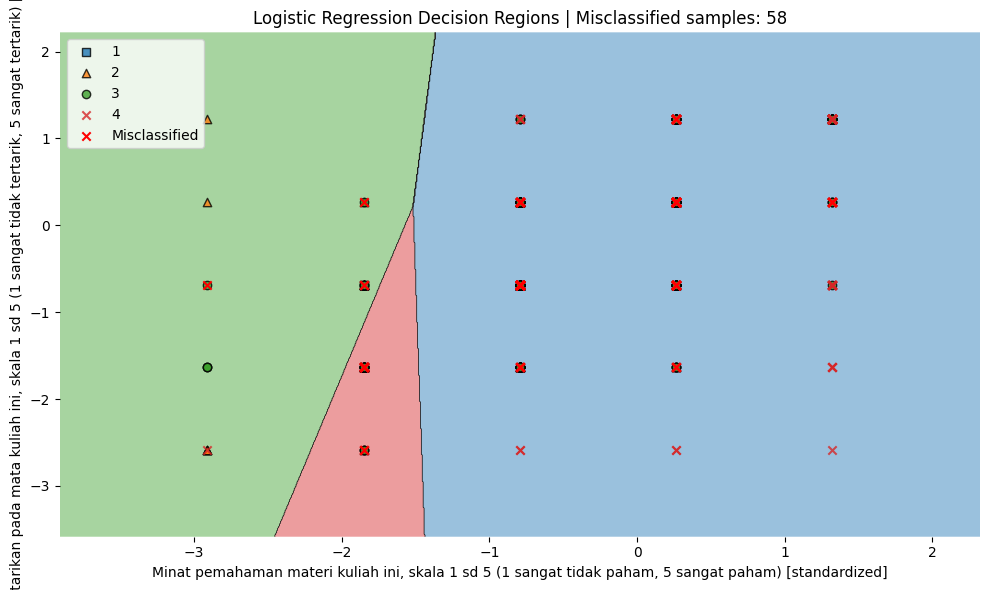

In [ ]:
# ====================== Logistic Regression ======================
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_std, y_train)
y_pred_lr = clf_lr.predict(X_test_std)

# Accuracy n F1 score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
cv_scores_lr = cross_val_score(clf_lr, X_selected, y, cv=5, scoring='accuracy')

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")

# Hitung misclassified
misclassified_samples_lr = (y_test != y_pred_lr).sum()
print(f"Misclassified samples: {misclassified_samples_lr}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_lr, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Logistic Regression Decision Regions | Misclassified samples: {misclassified_samples_lr}')

misclassified_points_lr = X_test_std[y_test != y_pred_lr]
plt.scatter(misclassified_points_lr[:, 0], misclassified_points_lr[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**Linear SVM**


Linear SVM Results:
Accuracy: 0.6442
F1 Score: 0.5048
5-Fold CV Accuracy: 0.6380
Misclassified samples: 58


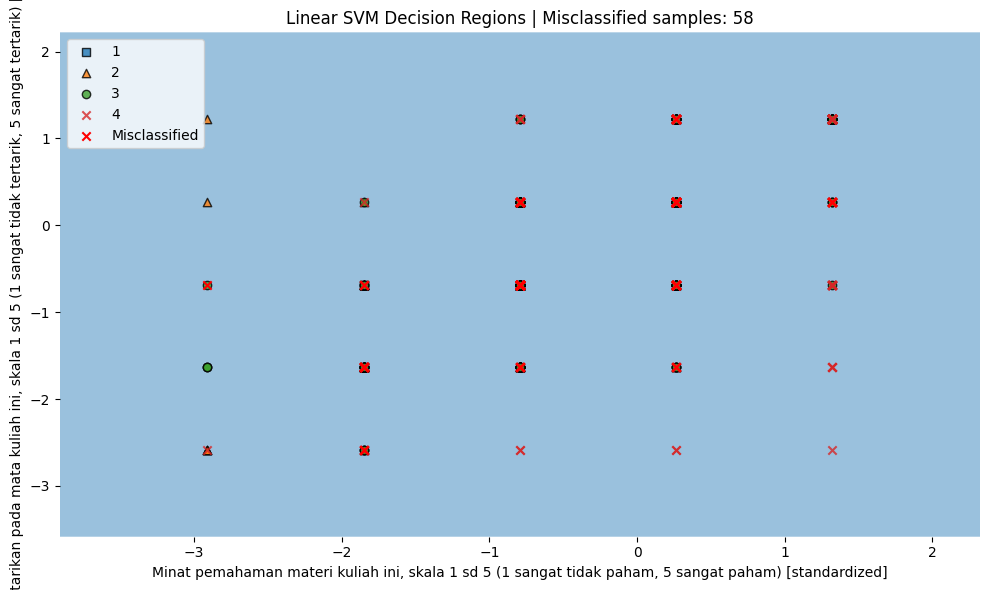

In [ ]:
# ====================== Linear SVM ======================
clf_svm_linear = SVC(kernel='linear', random_state=42)
clf_svm_linear.fit(X_train_std, y_train)
y_pred_svm_linear = clf_svm_linear.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test, y_pred_svm_linear, average='weighted')
cv_scores_svm_linear = cross_val_score(clf_svm_linear, X_selected, y, cv=5, scoring='accuracy')

print("\nLinear SVM Results:")
print(f"Accuracy: {accuracy_svm_linear:.4f}")
print(f"F1 Score: {f1_svm_linear:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_linear.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_linear = (y_test != y_pred_svm_linear).sum()
print(f"Misclassified samples: {misclassified_samples_svm_linear}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_linear, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Linear SVM Decision Regions | Misclassified samples: {misclassified_samples_svm_linear}')

misclassified_points_svm_linear = X_test_std[y_test != y_pred_svm_linear]
plt.scatter(misclassified_points_svm_linear[:, 0], misclassified_points_svm_linear[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**RBF SVM with gamma = 0.1**


RBF SVM (gamma=0.1) Results:
Accuracy: 0.6442
F1 Score: 0.5048
5-Fold CV Accuracy: 0.6368
Misclassified samples: 58


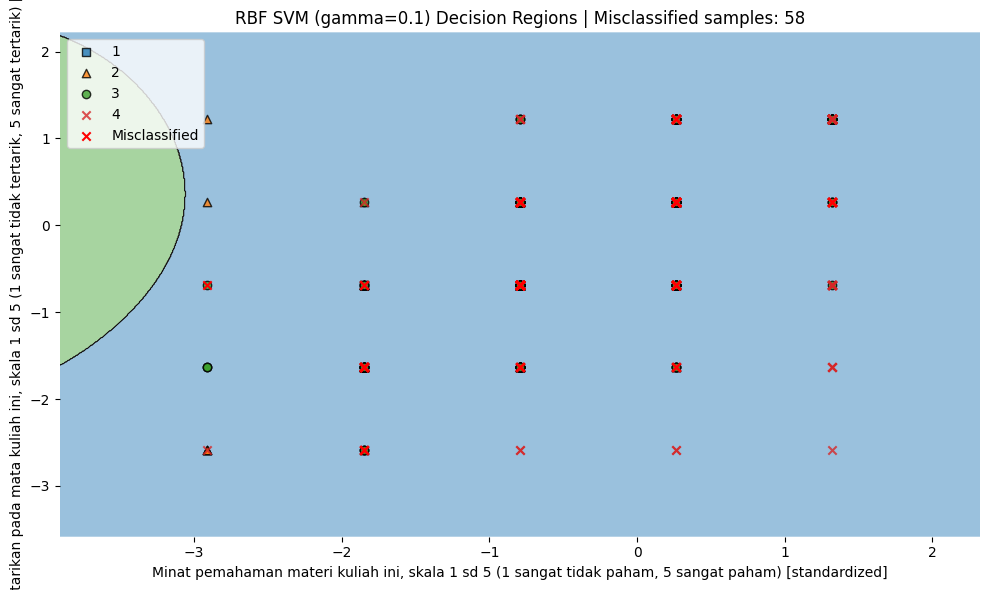

In [ ]:
# ====================== RBF SVM with different gamma values ======================
# RBF SVM with gamma = 0.1
clf_svm_rbf_01 = SVC(kernel='rbf', gamma=0.1, random_state=42)
clf_svm_rbf_01.fit(X_train_std, y_train)
y_pred_svm_rbf_01 = clf_svm_rbf_01.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_rbf_01 = accuracy_score(y_test, y_pred_svm_rbf_01)
f1_svm_rbf_01 = f1_score(y_test, y_pred_svm_rbf_01, average='weighted')
cv_scores_svm_rbf_01 = cross_val_score(clf_svm_rbf_01, X_selected, y, cv=5, scoring='accuracy')

print("\nRBF SVM (gamma=0.1) Results:")
print(f"Accuracy: {accuracy_svm_rbf_01:.4f}")
print(f"F1 Score: {f1_svm_rbf_01:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_rbf_01.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_rbf_01 = (y_test != y_pred_svm_rbf_01).sum()
print(f"Misclassified samples: {misclassified_samples_svm_rbf_01}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_rbf_01, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'RBF SVM (gamma=0.1) Decision Regions | Misclassified samples: {misclassified_samples_svm_rbf_01}')

misclassified_points_svm_rbf_01 = X_test_std[y_test != y_pred_svm_rbf_01]
plt.scatter(misclassified_points_svm_rbf_01[:, 0], misclassified_points_svm_rbf_01[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


####**RBF SVM with gamma = 1**


RBF SVM (gamma=1) Results:
Accuracy: 0.6380
F1 Score: 0.5492
5-Fold CV Accuracy: 0.6380
Misclassified samples: 59


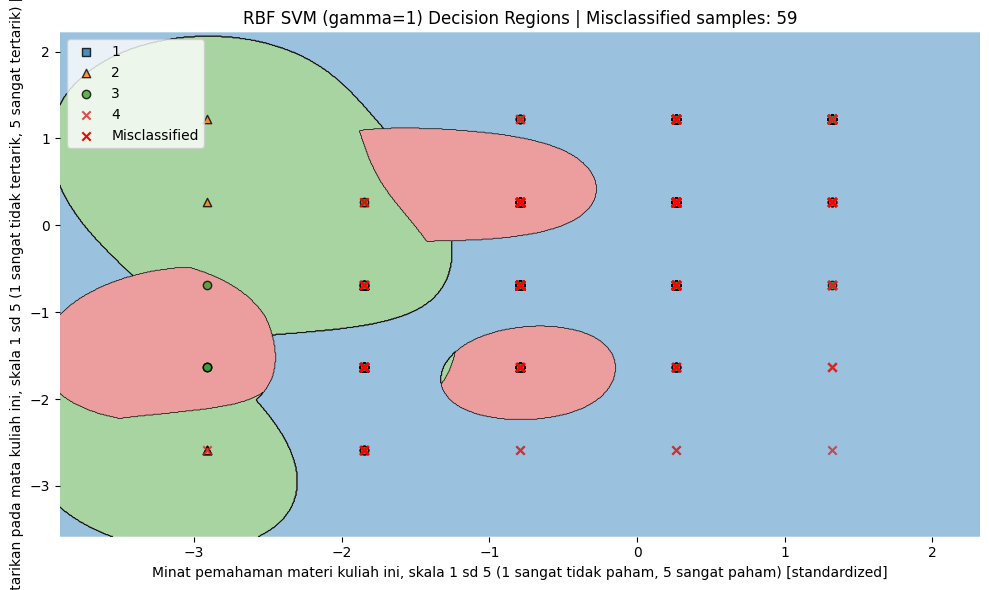

In [ ]:
# ====================== RBF SVM with different gamma values ======================
# RBF SVM with gamma = 1
clf_svm_rbf_1 = SVC(kernel='rbf', gamma=1, random_state=42)
clf_svm_rbf_1.fit(X_train_std, y_train)
y_pred_svm_rbf_1 = clf_svm_rbf_1.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_rbf_1 = accuracy_score(y_test, y_pred_svm_rbf_1)
f1_svm_rbf_1 = f1_score(y_test, y_pred_svm_rbf_1, average='weighted')
cv_scores_svm_rbf_1 = cross_val_score(clf_svm_rbf_1, X_selected, y, cv=5, scoring='accuracy')

print("\nRBF SVM (gamma=1) Results:")
print(f"Accuracy: {accuracy_svm_rbf_1:.4f}")
print(f"F1 Score: {f1_svm_rbf_1:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_rbf_1.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_rbf_1 = (y_test != y_pred_svm_rbf_1).sum()
print(f"Misclassified samples: {misclassified_samples_svm_rbf_1}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_rbf_1, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'RBF SVM (gamma=1) Decision Regions | Misclassified samples: {misclassified_samples_svm_rbf_1}')

misclassified_points_svm_rbf_1 = X_test_std[y_test != y_pred_svm_rbf_1]
plt.scatter(misclassified_points_svm_rbf_1[:, 0], misclassified_points_svm_rbf_1[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**Decision Tree**


Decision Tree Results:
Accuracy: 0.6319
F1 Score: 0.5421
5-Fold CV Accuracy: 0.6344
Misclassified samples: 60


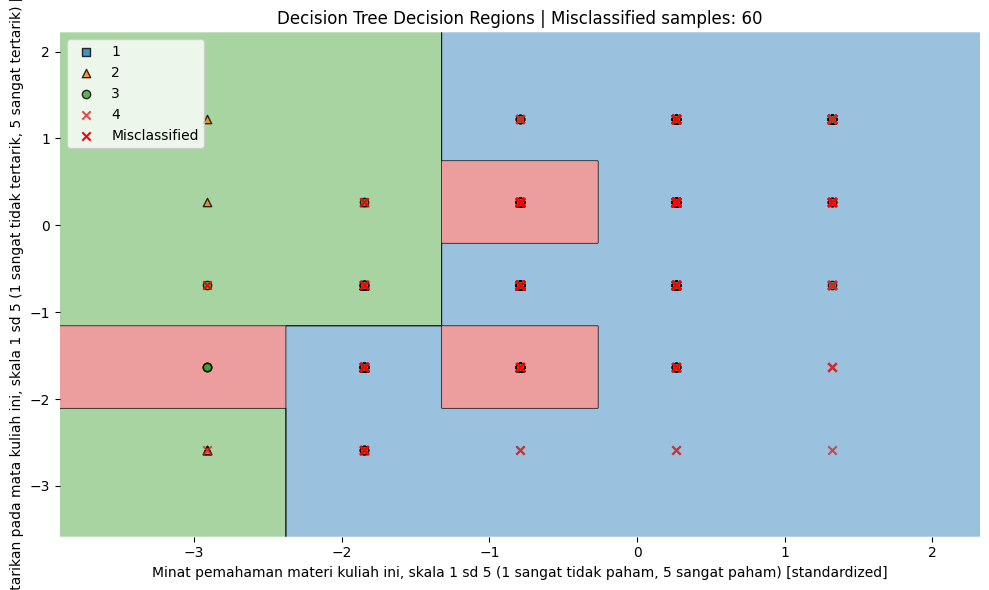

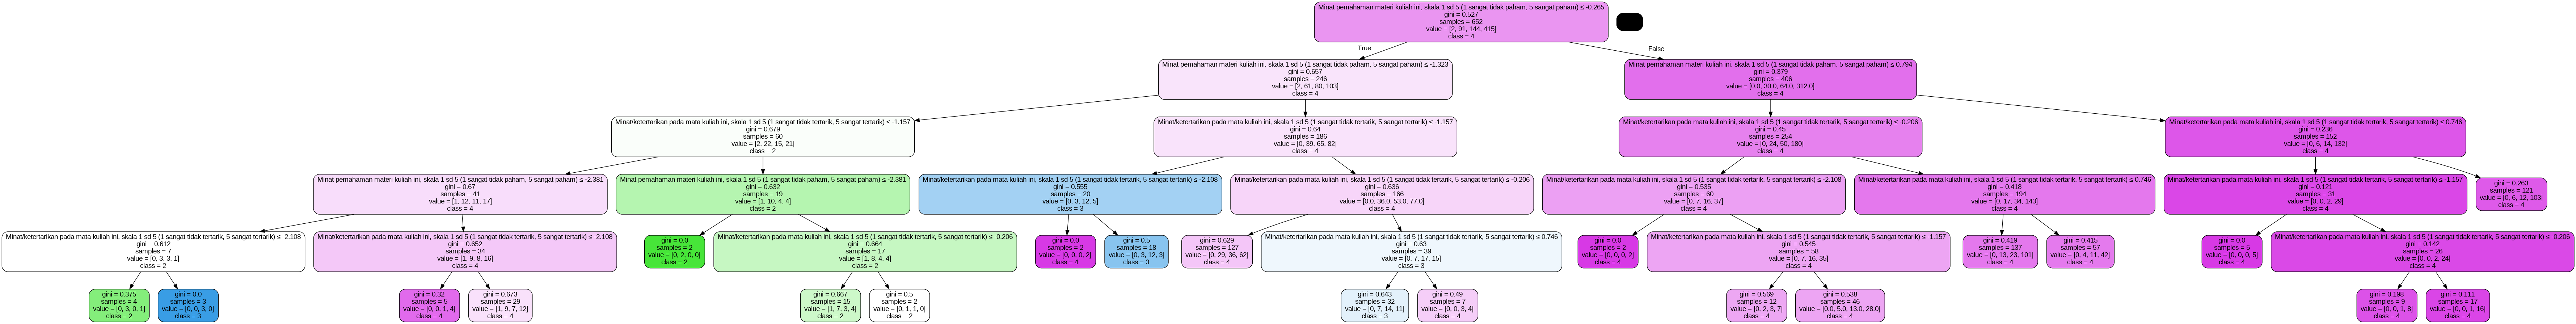

In [ ]:
# ====================== Decision Tree ======================
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus

# ====================== Decision Tree Visualization ======================

# Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_std, y_train)
y_pred_tree = clf_tree.predict(X_test_std)

# Accuracy and F1 score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
cv_scores_tree = cross_val_score(clf_tree, X_selected, y, cv=5, scoring='accuracy')

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_tree.mean():.4f}")

# Hitung misclassification
misclassified_samples_tree = (y_test != y_pred_tree).sum()
print(f"Misclassified samples: {misclassified_samples_tree}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_tree, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Decision Tree Decision Regions | Misclassified samples: {misclassified_samples_tree}')

misclassified_points_tree = X_test_std[y_test != y_pred_tree]
plt.scatter(misclassified_points_tree[:, 0], misclassified_points_tree[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Visualizing decision tree
try:
    dot_data = export_graphviz(
        clf_tree,
        out_file=None,
        feature_names=top_features,
        class_names=[str(i) for i in np.unique(y)],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data)

    display(Image(graph.create_png()))

except ImportError:
    print('pydotplus is not installed.')


####**Random Forest**


Random Forest Results:
Accuracy: 0.6380
F1 Score: 0.5484
5-Fold CV Accuracy: 0.6442
Misclassified samples: 59


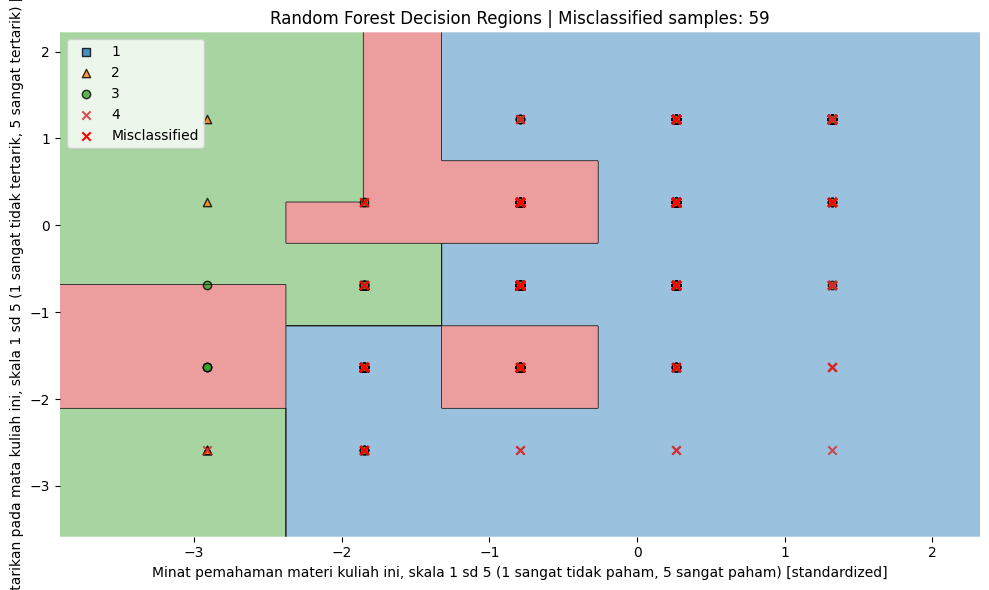

In [ ]:
# ====================== Random Forest ======================
# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_std, y_train)
y_pred_rf = clf_rf.predict(X_test_std)

# Accuracy and F1 score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cv_scores_rf = cross_val_score(clf_rf, X_selected, y, cv=5, scoring='accuracy')

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")

# Hitung misclassification
misclassified_samples_rf = (y_test != y_pred_rf).sum()
print(f"Misclassified samples: {misclassified_samples_rf}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_rf, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Random Forest Decision Regions | Misclassified samples: {misclassified_samples_rf}')

misclassified_points_rf = X_test_std[y_test != y_pred_rf]
plt.scatter(misclassified_points_rf[:, 0], misclassified_points_rf[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**K-Nearest Neighbors (KNN)**


K-Nearest Neighbors (KNN) Results:
Accuracy: 0.5890
F1 Score: 0.5990
5-Fold CV Accuracy: 0.6282
Misclassified samples: 67


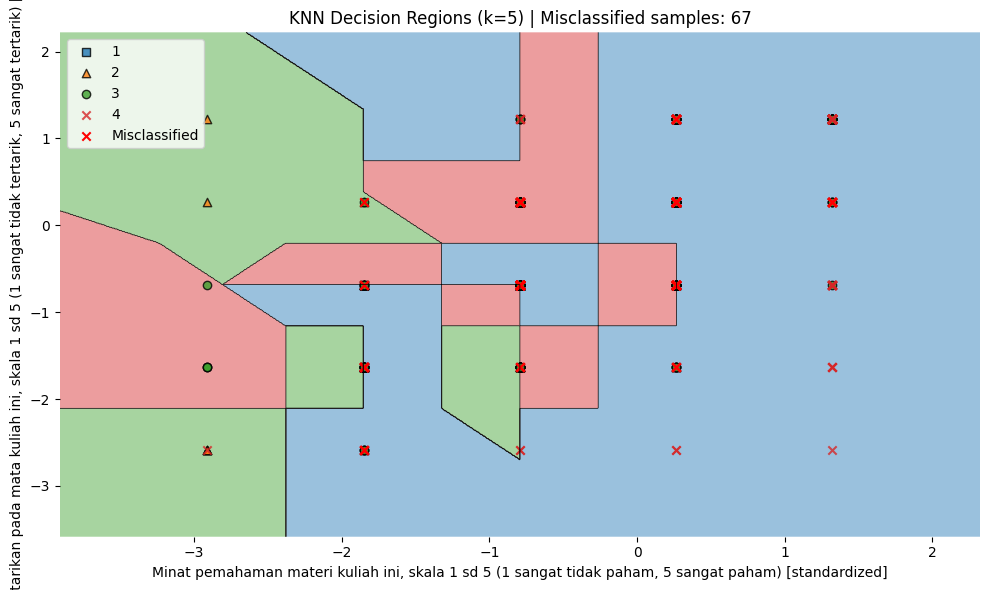

In [ ]:
# ====================== K-Nearest Neighbors (KNN) ======================
clf_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa tuning nilai k
clf_knn.fit(X_train_std, y_train)
y_pred_knn = clf_knn.predict(X_test_std)

# Accuracy n F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cv_scores_knn = cross_val_score(clf_knn, X_selected, y, cv=5, scoring='accuracy')

print("\nK-Nearest Neighbors (KNN) Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_knn.mean():.4f}")

# Hitung misclassification
misclassified_samples_knn = (y_test != y_pred_knn).sum()
print(f"Misclassified samples: {misclassified_samples_knn}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_knn, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'KNN Decision Regions (k=5) | Misclassified samples: {misclassified_samples_knn}')

misclassified_points_knn = X_test_std[y_test != y_pred_knn]
plt.scatter(misclassified_points_knn[:, 0], misclassified_points_knn[:, 1],
            color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**Analisis dan Perbandingan Model**


Model Comparison:


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
0           Perceptron  0.595092  0.568645            0.527607   
1  Logistic Regression  0.644172  0.542460            0.644172   
2           Linear SVM  0.644172  0.504761            0.638037   
3  RBF SVM (gamma=0.1)  0.644172  0.504761            0.636810   
4    RBF SVM (gamma=1)  0.638037  0.549225            0.638037   
5        Decision Tree  0.631902  0.542143            0.634356   
6        Random Forest  0.638037  0.548357            0.644172   
7                  KNN  0.588957  0.598970            0.628221   

   Misclassified Samples  
0                     66  
1                     58  
2                     58  
3                     58  
4                     59  
5                     60  
6                     59  
7                     67


Model Comparison (Sorted by Accuracy):


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
1  Logistic Regression  0.644172  0.542460            0.644172   
2           Linear SVM  0.644172  0.504761            0.638037   
3  RBF SVM (gamma=0.1)  0.644172  0.504761            0.636810   
4    RBF SVM (gamma=1)  0.638037  0.549225            0.638037   
6        Random Forest  0.638037  0.548357            0.644172   
5        Decision Tree  0.631902  0.542143            0.634356   
0           Perceptron  0.595092  0.568645            0.527607   
7                  KNN  0.588957  0.598970            0.628221   

   Misclassified Samples  
1                     58  
2                     58  
3                     58  
4                     59  
6                     59  
5                     60  
0                     66  
7                     67

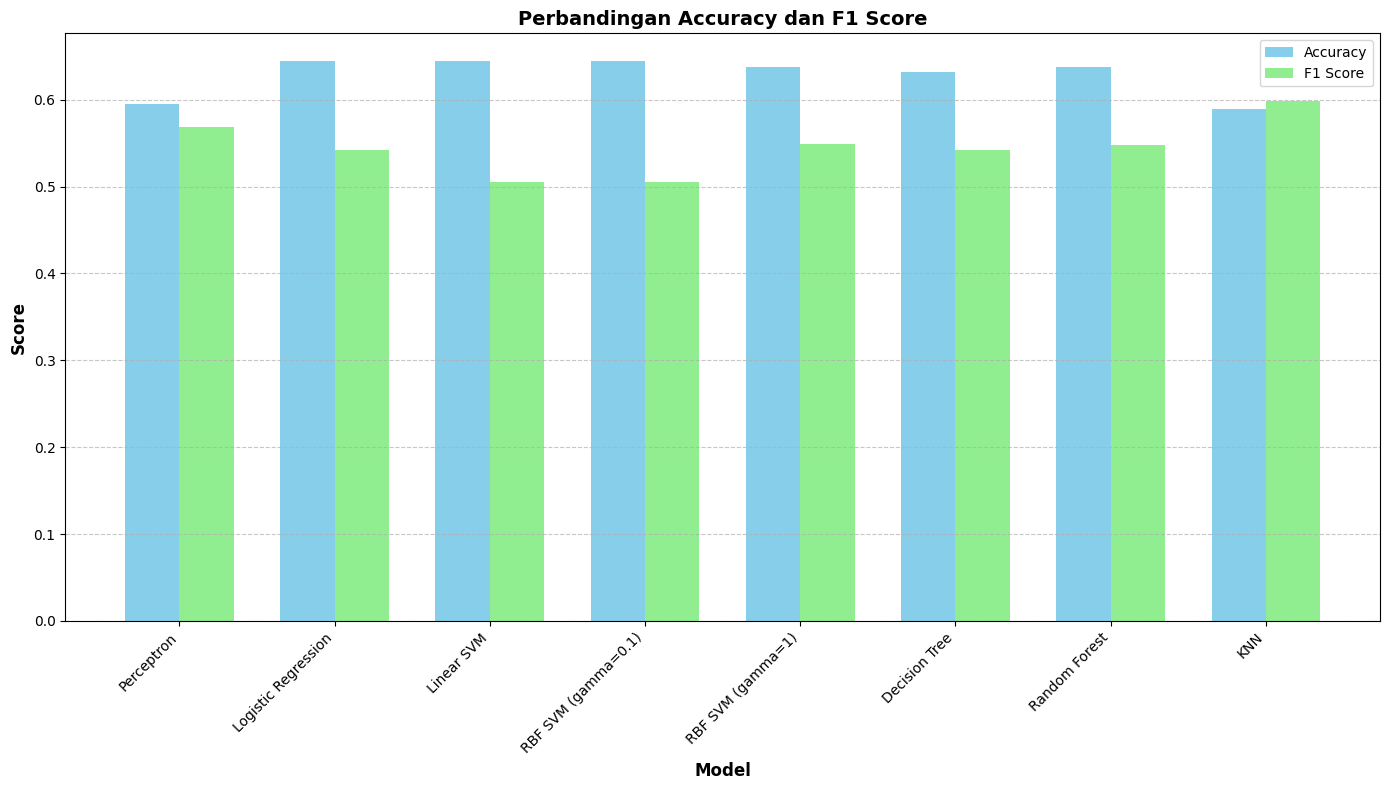

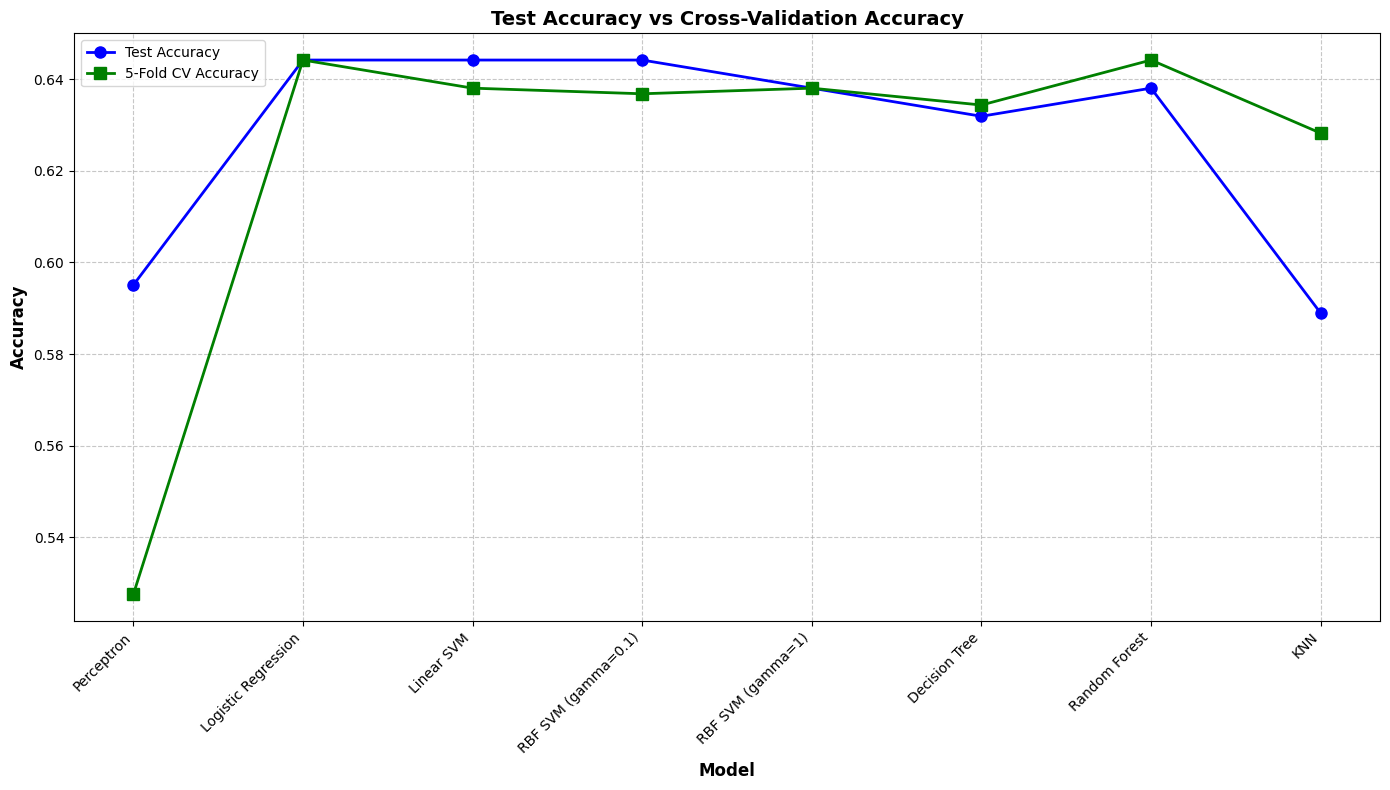

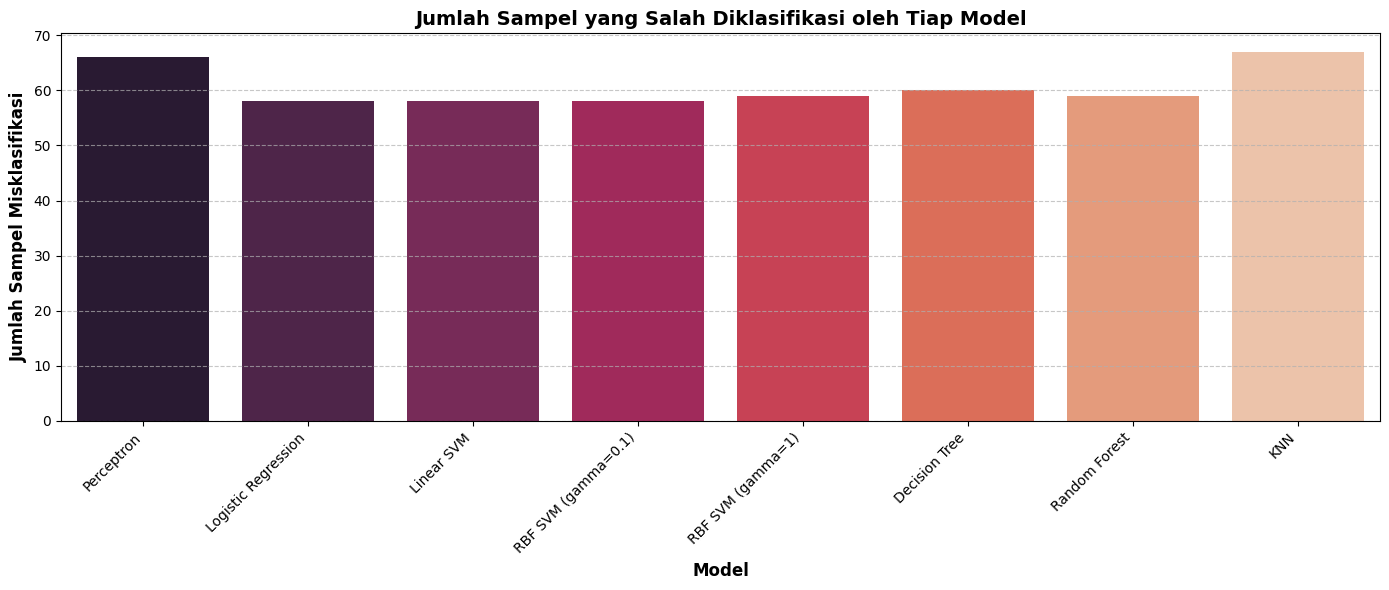

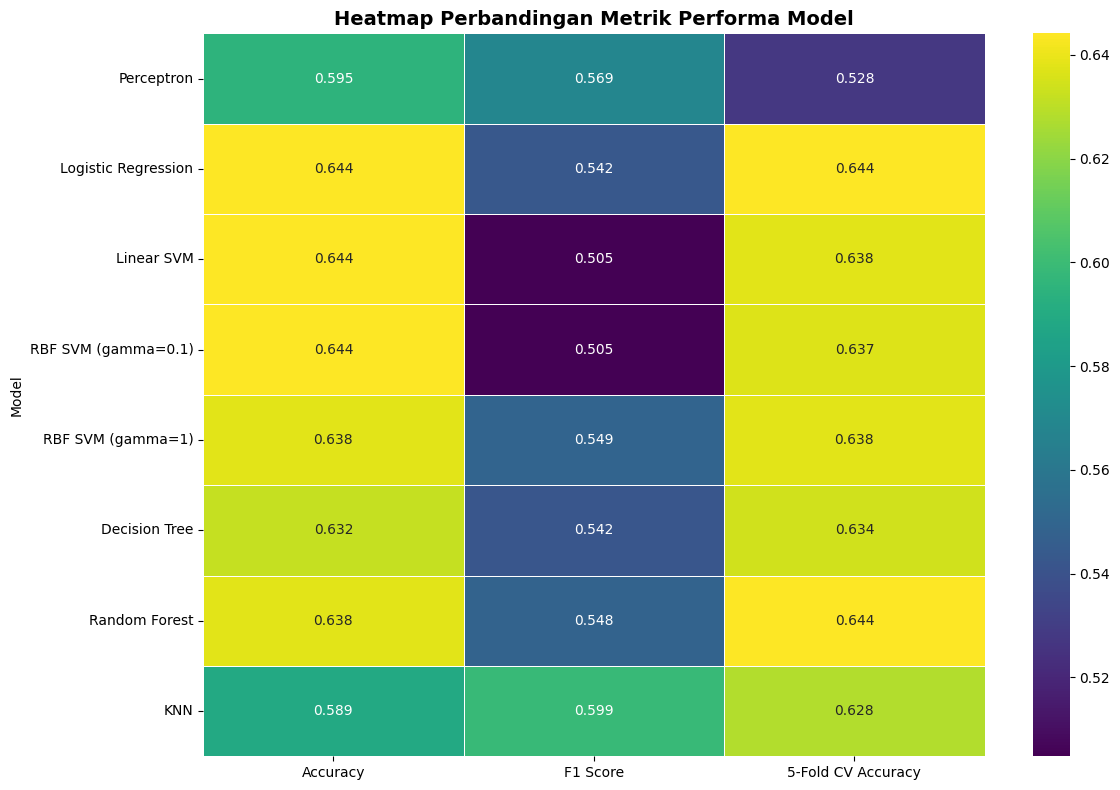

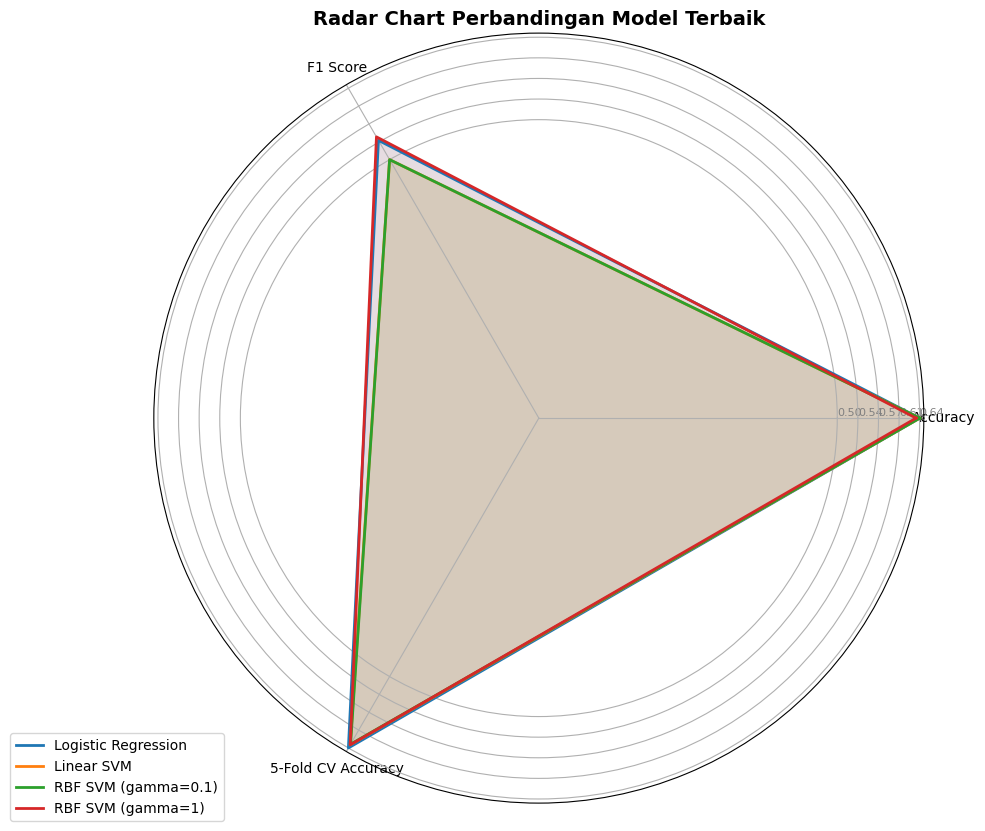

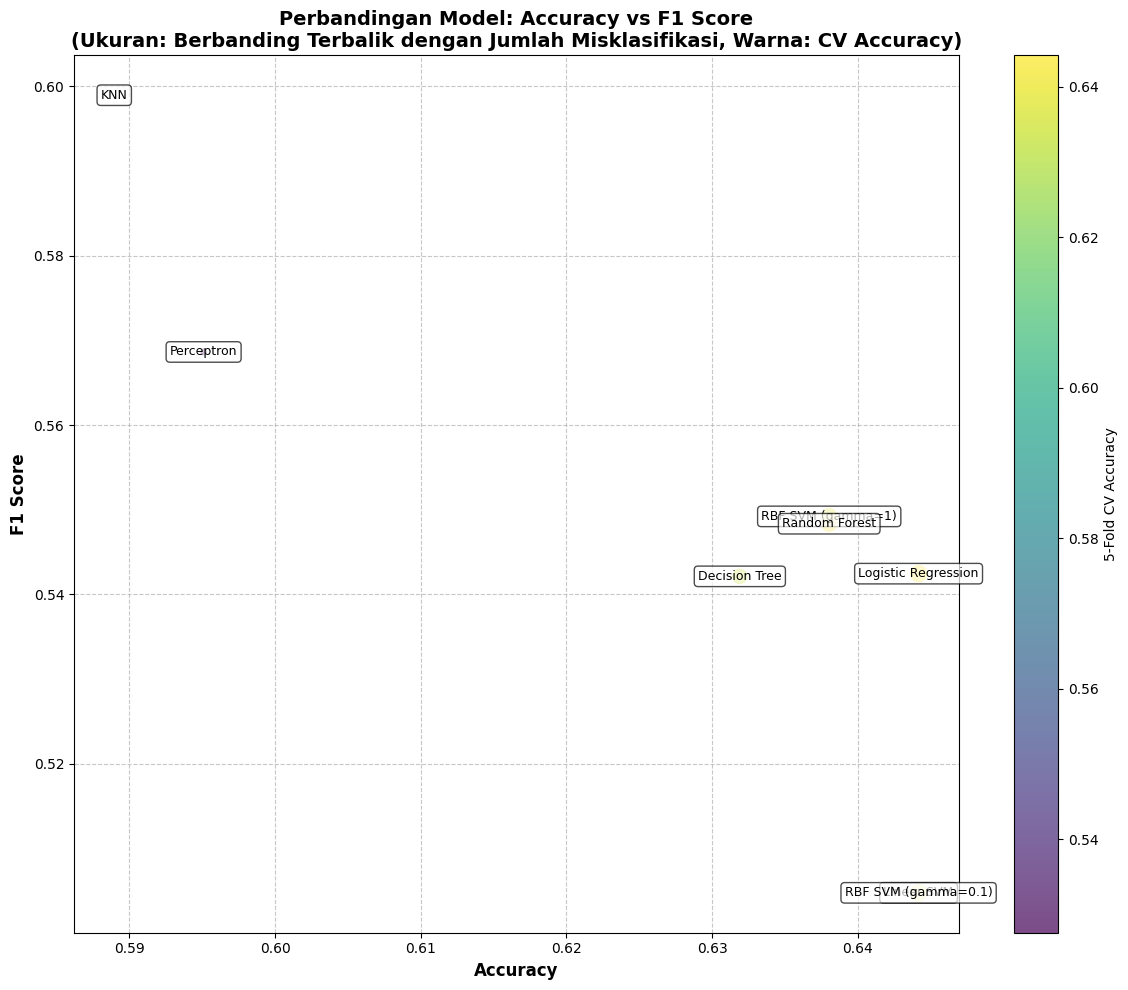

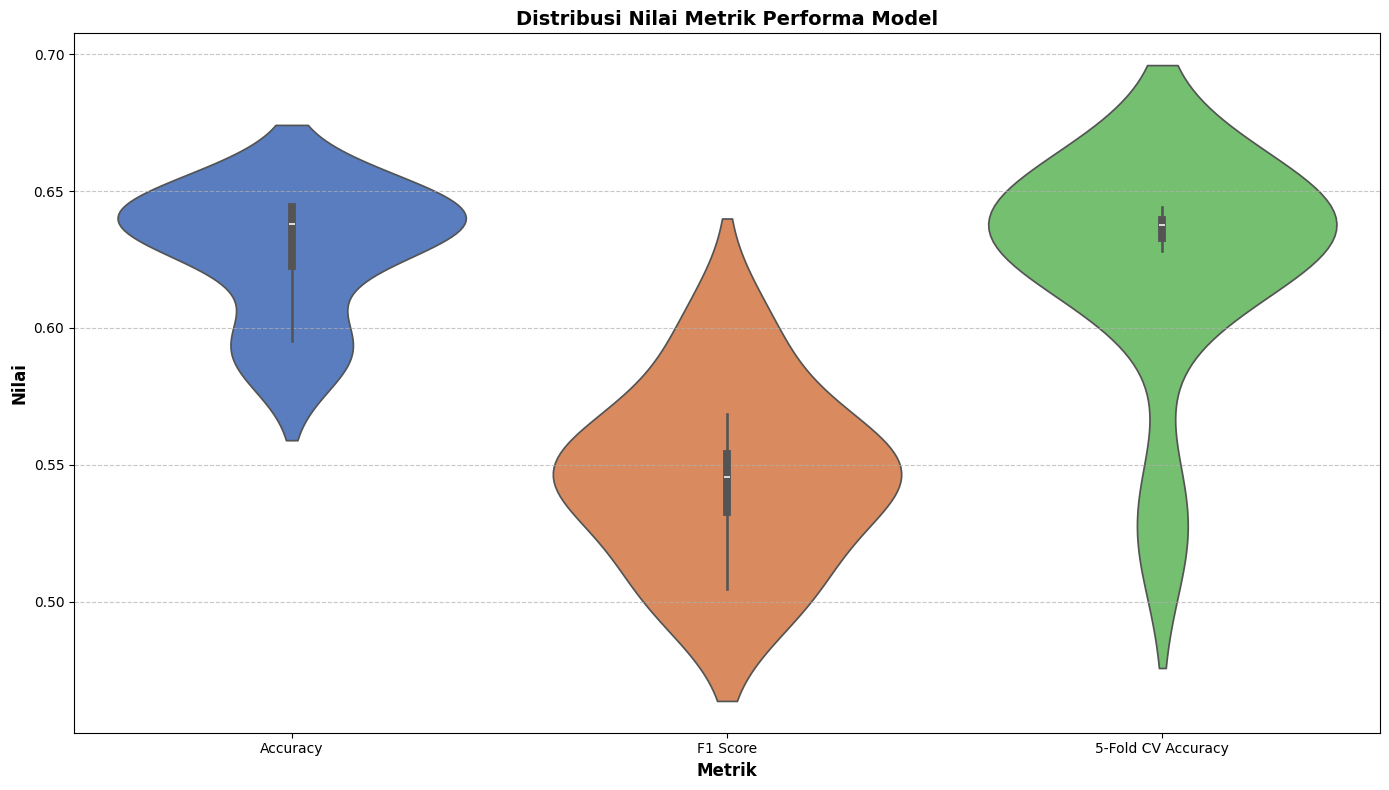

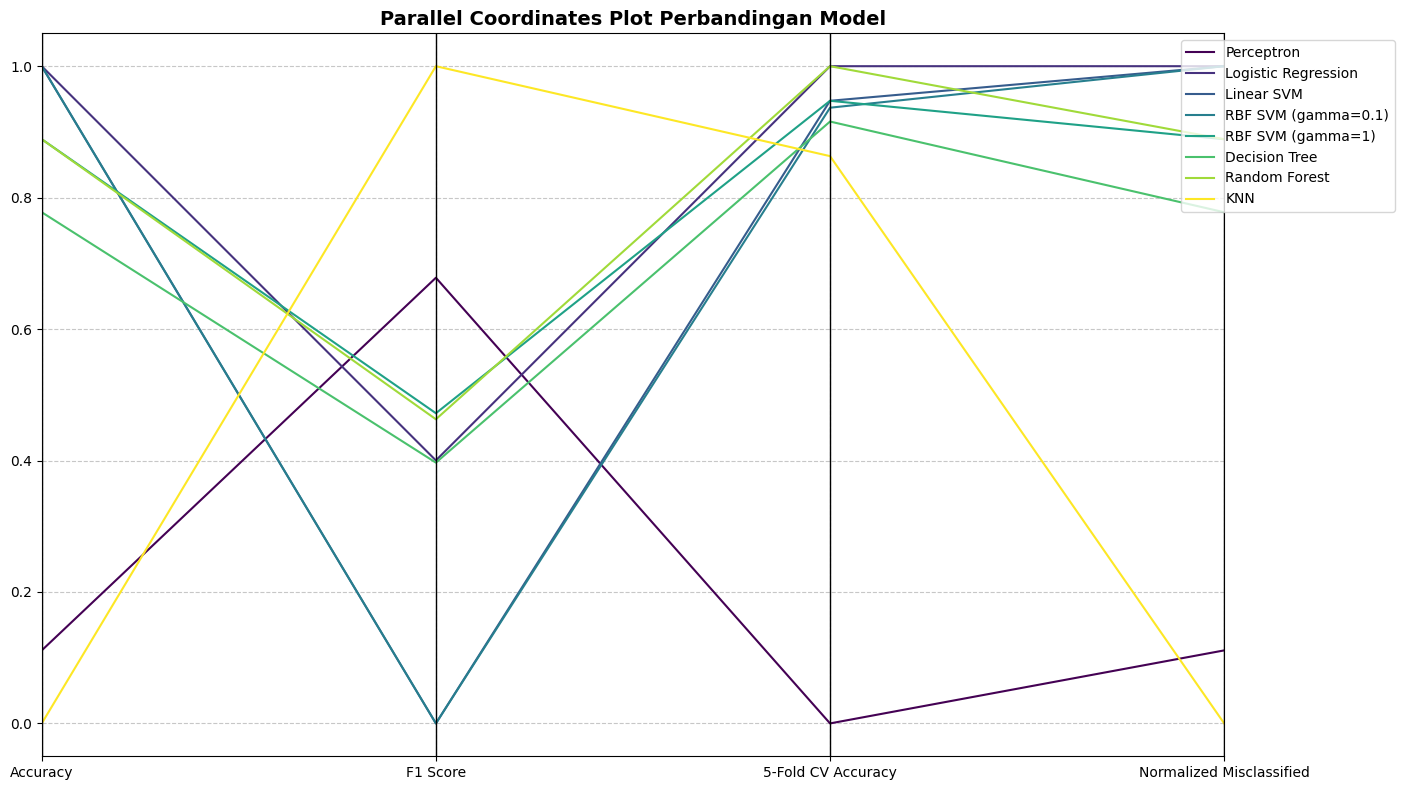


Model terbaik berdasarkan akurasi: Logistic Regression dengan akurasi 0.6442
Model terbaik berdasarkan F1 Score: KNN dengan F1 Score 0.5990
Model terbaik berdasarkan cross-validation: Logistic Regression dengan CV Accuracy 0.6442
Model dengan jumlah kesalahan klasifikasi terendah: Logistic Regression dengan 58 sampel salah klasifikasi

Peringkat Keseluruhan Model (berdasarkan gabungan semua metrik):


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
1  Logistic Regression  0.644172  0.542460            0.644172   
6        Random Forest  0.638037  0.548357            0.644172   
4    RBF SVM (gamma=1)  0.638037  0.549225            0.638037   
2           Linear SVM  0.644172  0.504761            0.638037   
3  RBF SVM (gamma=0.1)  0.644172  0.504761            0.636810   
0           Perceptron  0.595092  0.568645            0.527607   
5        Decision Tree  0.631902  0.542143            0.634356   
7                  KNN  0.588957  0.598970            0.628221   

   Misclassified Samples  Accuracy Rank  F1 Rank  CV Rank  Misclassified Rank  \
1                     58            2.0      5.0      1.5                 2.0   
6                     59            4.5      4.0      1.5                 4.5   
4                     59            4.5      3.0      3.0                 4.5   
2                     58            2.0      7.5      4.0                 2.0   
3                     58            2.0      7.5      5.0                 2.0   
0                     66            7.0      2.0      8.0                 7.0   
5                     60            6.0      6.0      6.0                 6.0   
7                     67            8.0      1.0      7.0                 8.0   

   Overall Rank  
1         2.625  
6         3.625  
4         3.750  
2         3.875  
3         4.125  
0         6.000  
5         6.000  
7         6.000


Model terbaik secara keseluruhan: Logistic Regression

Rekomendasi Final:
Berdasarkan analisis komprehensif, model Logistic Regression menunjukkan performa terbaik secara keseluruhan.
Model ini memberikan keseimbangan optimal antara akurasi prediksi, F1 score, stabilitas cross-validation, dan minimalisasi kesalahan klasifikasi.


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Perceptron', 'Logistic Regression', 'Linear SVM', 'RBF SVM (gamma=0.1)',
              'RBF SVM (gamma=1)', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy, accuracy_lr, accuracy_svm_linear, accuracy_svm_rbf_01,
                accuracy_svm_rbf_1, accuracy_tree, accuracy_rf, accuracy_knn],
    'F1 Score': [f1, f1_lr, f1_svm_linear, f1_svm_rbf_01,
                f1_svm_rbf_1, f1_tree, f1_rf, f1_knn],
    '5-Fold CV Accuracy': [cv_scores.mean(), cv_scores_lr.mean(), cv_scores_svm_linear.mean(),
                          cv_scores_svm_rbf_01.mean(), cv_scores_svm_rbf_1.mean(),
                          cv_scores_tree.mean(), cv_scores_rf.mean(), cv_scores_knn.mean()],
    'Misclassified Samples': [misclassified_samples_ppn, misclassified_samples_lr,
                             misclassified_samples_svm_linear, misclassified_samples_svm_rbf_01,
                             misclassified_samples_svm_rbf_1, misclassified_samples_tree,
                             misclassified_samples_rf, misclassified_samples_knn]
})

# Menampilkan tabel hasil
print("\nModel Comparison:")
display(results_df)

# Menampilkan model yang diurutkan berdasarkan akurasi
print("\nModel Comparison (Sorted by Accuracy):")
display(results_df.sort_values(by='Accuracy', ascending=False))

# 1. Visualisasi perbandingan akurasi dan F1 Score
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(results_df['Model']))

plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, results_df['F1 Score'], bar_width, label='F1 Score', color='lightgreen')

plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.title('Perbandingan Accuracy dan F1 Score', fontweight='bold', fontsize=14)
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Visualisasi CV Accuracy vs Test Accuracy
plt.figure(figsize=(14, 8))
models = results_df['Model']
test_acc = results_df['Accuracy']
cv_acc = results_df['5-Fold CV Accuracy']

plt.plot(models, test_acc, 'o-', label='Test Accuracy', markersize=8, linewidth=2, color='blue')
plt.plot(models, cv_acc, 's-', label='5-Fold CV Accuracy', markersize=8, linewidth=2, color='green')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Test Accuracy vs Cross-Validation Accuracy', fontweight='bold', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualisasi jumlah sampel yang salah klasifikasi
plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='Misclassified Samples', data=results_df, palette='rocket')
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Jumlah Sampel Misklasifikasi', fontweight='bold', fontsize=12)
plt.title('Jumlah Sampel yang Salah Diklasifikasi oleh Tiap Model', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Heatmap perbandingan metrik
plt.figure(figsize=(12, 8))
heatmap_data = results_df.set_index('Model')
heatmap_data = heatmap_data.drop('Misclassified Samples', axis=1)  # Remove for better color scaling
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('Heatmap Perbandingan Metrik Performa Model', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Radar chart untuk perbandingan model terbaik
# Pilih beberapa model terbaik untuk perbandingan
top_models = results_df.sort_values(by='Accuracy', ascending=False).head(4)

# Persiapan data untuk radar chart
categories = ['Accuracy', 'F1 Score', '5-Fold CV Accuracy']
N = len(categories)

# Buat sudut untuk setiap kategori
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Tambahkan plotting untuk tiap model
for i, model in enumerate(top_models['Model']):
    row_idx = top_models.index[i]
    values = top_models.loc[row_idx, categories].tolist()
    values += values[:1]  # Close the loop

    plt.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    plt.fill(angles, values, alpha=0.1)

# Customize radar chart
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# Menentukan nilai ticks berdasarkan range data aktual
y_ticks = np.linspace(min(results_df[categories].min()), max(results_df[categories].max()), 5)
plt.yticks(y_ticks, [f'{x:.2f}' for x in y_ticks], color="grey", size=8)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart Perbandingan Model Terbaik', fontweight='bold', fontsize=14)
plt.grid(True)
plt.show()

# 6. Visualisasi perbandingan model dengan scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(results_df['Accuracy'], results_df['F1 Score'],
            s=1000*(1-results_df['Misclassified Samples']/results_df['Misclassified Samples'].max()),
            alpha=0.7, c=results_df['5-Fold CV Accuracy'], cmap='viridis')

# Tambahkan label untuk setiap titik
for i, model in enumerate(results_df['Model']):
    plt.annotate(model, (results_df['Accuracy'][i], results_df['F1 Score'][i]),
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Accuracy', fontweight='bold', fontsize=12)
plt.ylabel('F1 Score', fontweight='bold', fontsize=12)
plt.title('Perbandingan Model: Accuracy vs F1 Score\n(Ukuran: Berbanding Terbalik dengan Jumlah Misklasifikasi, Warna: CV Accuracy)',
         fontweight='bold', fontsize=14)
plt.colorbar(label='5-Fold CV Accuracy')
plt.tight_layout()
plt.show()

# 7. Visualisasi distribusi metrik dengan violin plot
metrics_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['Accuracy', 'F1 Score', '5-Fold CV Accuracy'],
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.violinplot(x='Metric', y='Value', data=metrics_melted, palette='muted')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Metrik', fontweight='bold', fontsize=12)
plt.ylabel('Nilai', fontweight='bold', fontsize=12)
plt.title('Distribusi Nilai Metrik Performa Model', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 8. Visualisasi dengan Parallel Coordinates Plot
plt.figure(figsize=(14, 8))
# Menormalisasi data untuk plot parallel coordinates
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
plot_data = results_df.copy()
plot_data['Normalized Misclassified'] = 1 - scaler.fit_transform(plot_data[['Misclassified Samples']])
plot_columns = ['Accuracy', 'F1 Score', '5-Fold CV Accuracy', 'Normalized Misclassified']
normalized_data = pd.DataFrame(scaler.fit_transform(plot_data[plot_columns]), columns=plot_columns)
normalized_data['Model'] = plot_data['Model']

# Plot parallel coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(normalized_data, 'Model', colormap='viridis')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Parallel Coordinates Plot Perbandingan Model', fontweight='bold', fontsize=14)
plt.xticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Analisis dan kesimpulan
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nModel terbaik berdasarkan akurasi: {best_model['Model']} dengan akurasi {best_model['Accuracy']:.4f}")

best_f1 = results_df.loc[results_df['F1 Score'].idxmax()]
print(f"Model terbaik berdasarkan F1 Score: {best_f1['Model']} dengan F1 Score {best_f1['F1 Score']:.4f}")

best_cv = results_df.loc[results_df['5-Fold CV Accuracy'].idxmax()]
print(f"Model terbaik berdasarkan cross-validation: {best_cv['Model']} dengan CV Accuracy {best_cv['5-Fold CV Accuracy']:.4f}")

best_misclassified = results_df.loc[results_df['Misclassified Samples'].idxmin()]
print(f"Model dengan jumlah kesalahan klasifikasi terendah: {best_misclassified['Model']} dengan {best_misclassified['Misclassified Samples']} sampel salah klasifikasi")

# Menghitung skor gabungan berdasarkan peringkat
results_df['Accuracy Rank'] = results_df['Accuracy'].rank(ascending=False)
results_df['F1 Rank'] = results_df['F1 Score'].rank(ascending=False)
results_df['CV Rank'] = results_df['5-Fold CV Accuracy'].rank(ascending=False)
results_df['Misclassified Rank'] = results_df['Misclassified Samples'].rank()

results_df['Overall Rank'] = (results_df['Accuracy Rank'] + results_df['F1 Rank'] +
                              results_df['CV Rank'] + results_df['Misclassified Rank']) / 4

print("\nPeringkat Keseluruhan Model (berdasarkan gabungan semua metrik):")
display(results_df.sort_values(by='Overall Rank'))

overall_best = results_df.loc[results_df['Overall Rank'].idxmin()]
print(f"\nModel terbaik secara keseluruhan: {overall_best['Model']}")

print("\nRekomendasi Final:")
print(f"Berdasarkan analisis komprehensif, model {overall_best['Model']} menunjukkan performa terbaik secara keseluruhan.")
print("Model ini memberikan keseimbangan optimal antara akurasi prediksi, F1 score, stabilitas cross-validation, dan minimalisasi kesalahan klasifikasi.")

###2. Buat machine learning dengan tree tapi kali ini pakai seluruh input. Berdasarkan hasil tersebut mana kira-kira input yang paling penting?

Decision Tree (All Features) Results:
Accuracy: 0.5890
F1 Score: 0.5833
Mean Squared Error: 0.7914
R² Score: -0.2356
5-Fold CV Accuracy: 0.5497
Misclassified samples: 67

Feature Importance DT:
                                              Feature  Importance
0                                          Jumlah SKS    0.123027
3   Minat pemahaman materi kuliah ini, skala 1 sd ...    0.103128
12                              Jumlah_Komponen_Nilai    0.065851
1   Tingkat kesibukan di luar kuliah, skala 1 sd 5...    0.064952
4   Style mengajar dosen, skala 1 sd 5 (1 sangat t...    0.054613
5   Style belajar mahasiswa, skala 1 sd 5 (1 sanga...    0.052554
8                                            Ada_Kuis    0.046269
2   Minat/ketertarikan pada mata kuliah ini, skala...    0.046127
20                  Jenis kelamin mahasiswa_Perempuan    0.043465
16                          Pelaksanaan kuliah_Luring    0.038438


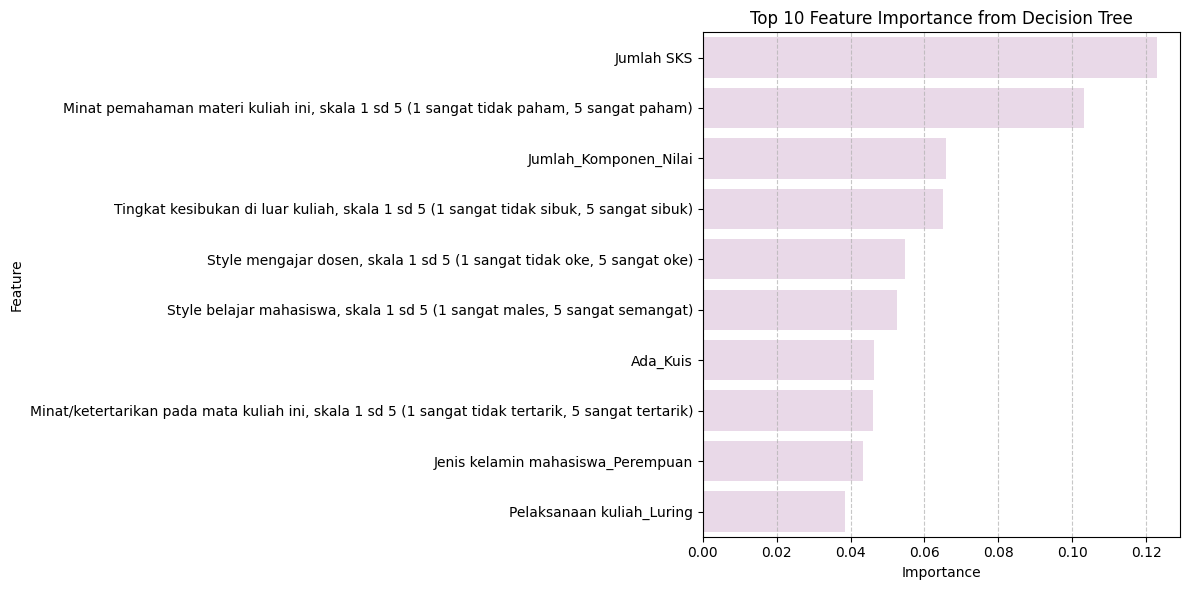

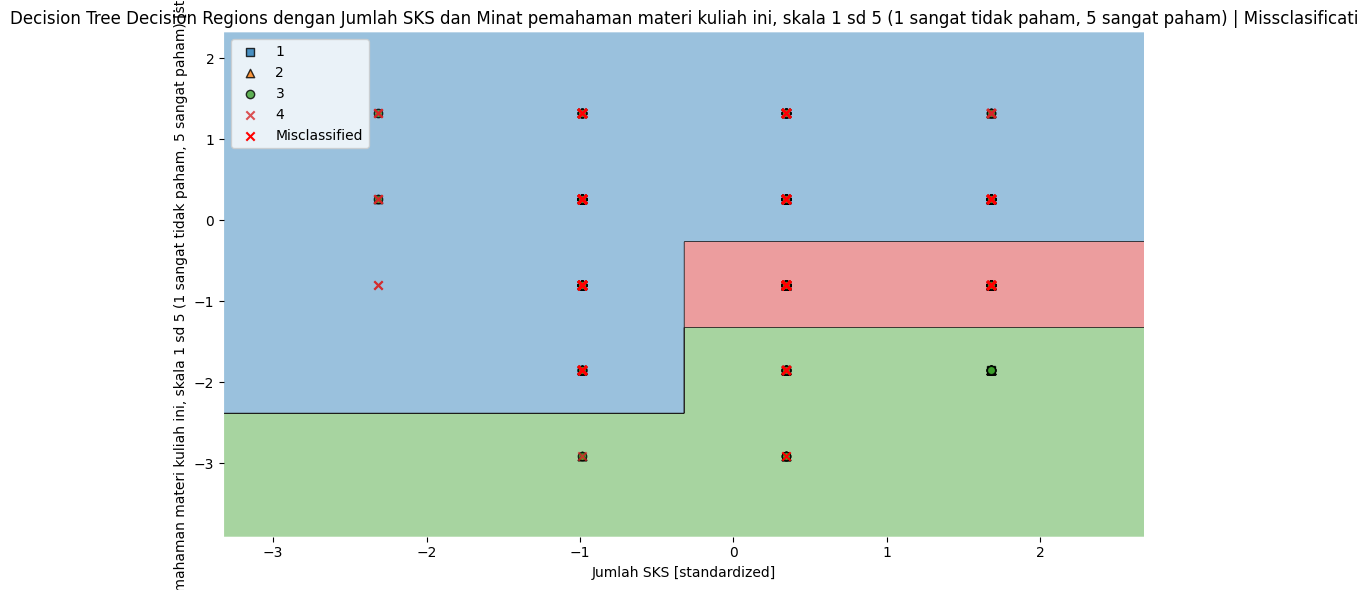

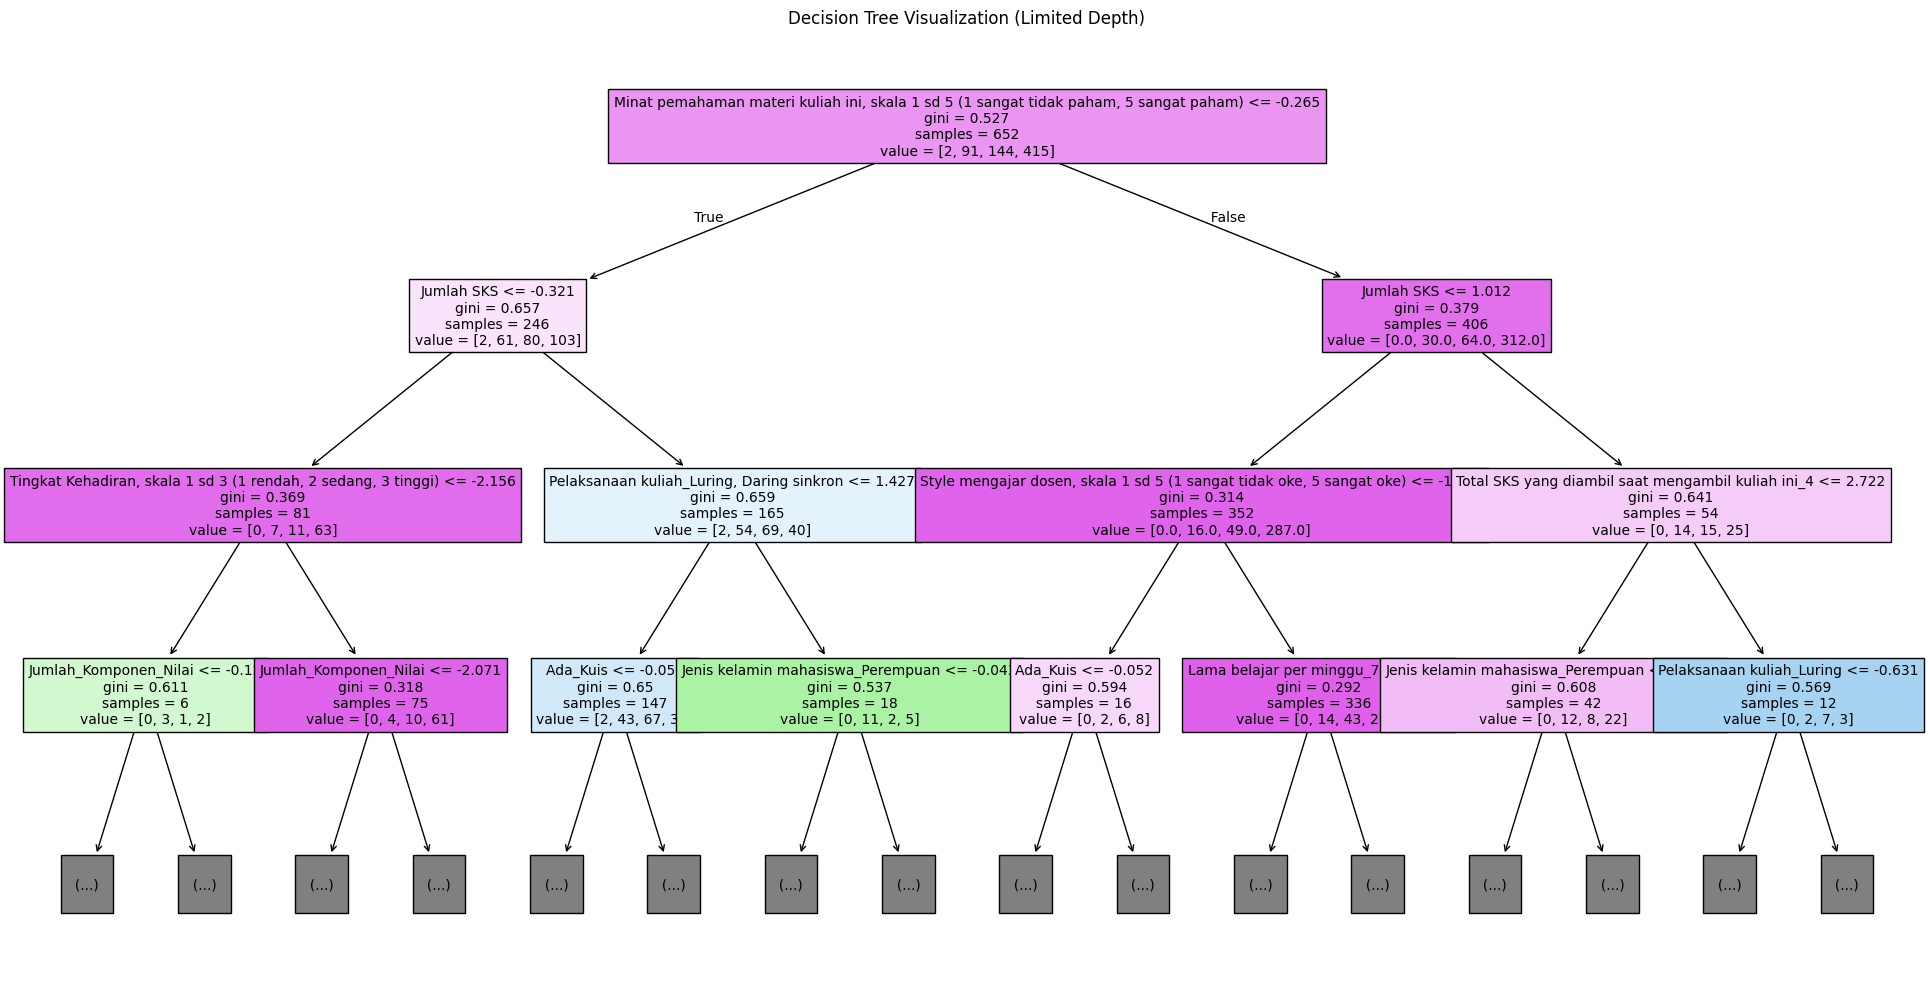

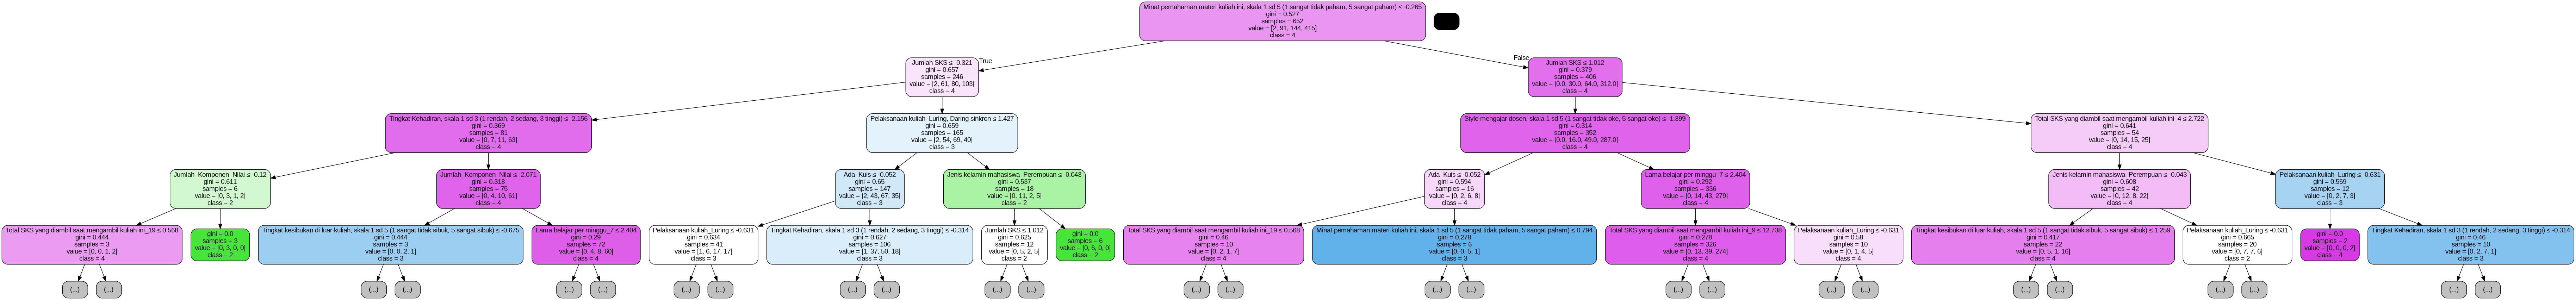

In [ ]:
# Split data menjadi training dan testing
X_all = X_encoded
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_all)
X_test_std = scaler.transform(X_test_all)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train_all, y_test_all))

# ====================== Decision Tree ======================
# Training model Decision Tree dengan seluruh feature
dt_all = DecisionTreeClassifier(random_state=42)
dt_all.fit(X_train_std, y_train_all)
y_pred_all = dt_all.predict(X_test_std)

# Evaluasi model
accuracy_tree = accuracy_score(y_test_all, y_pred_all)
f1_tree = f1_score(y_test_all, y_pred_all, average='weighted')
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)
cv_scores_tree = cross_val_score(dt_all, X_all, y, cv=5, scoring='accuracy')

print("Decision Tree (All Features) Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"Mean Squared Error: {mse_all:.4f}")
print(f"R² Score: {r2_all:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_tree.mean():.4f}")

# Hitung misclassification
misclassified_samples_tree = (y_test_all != y_pred_all).sum()
print(f"Misclassified samples: {misclassified_samples_tree}")

# Feature importance dari Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': dt_all.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance DT:")
print(feature_importance.head(10))

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), color='#ECD6EA')
plt.title('Top 10 Feature Importance from Decision Tree')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Ambil 2 feature terpenting
top_features = feature_importance['Feature'].tolist()[:2]
top_features_indices = [list(X_all.columns).index(feature) for feature in top_features]

# Membuat dataset yang hanya berisi 2 feature terpenting
X_selected = X_all[top_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Standardisasi data untuk 2 feature terpenting
scaler_selected = StandardScaler()
X_train_selected_std = scaler_selected.fit_transform(X_train_selected)
X_test_selected_std = scaler_selected.transform(X_test_selected)

# Gabungkan data untuk
X_combined_selected_std = np.vstack((X_train_selected_std, X_test_selected_std))
y_combined_selected = np.hstack((y_train_selected, y_test_selected))

# Train model dengan 2 feature terpenting saja
clf_tree_selected = DecisionTreeClassifier(random_state=42)
clf_tree_selected.fit(X_train_selected_std, y_train_selected)
y_pred_tree_selected = clf_tree_selected.predict(X_test_selected_std)

# Visualisasi region
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_selected_std, y=y_combined_selected, clf=clf_tree_selected, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Decision Tree Decision Regions dengan {top_features[0]} dan {top_features[1]} | Missclasificati')

# Nandain missclasification
misclassified_indices = y_test_selected != y_pred_tree_selected
misclassified_points = X_test_selected_std[misclassified_indices]
if len(misclassified_points) > 0:
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', marker='x', label='Misclassified')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Visualisasi dt
plt.figure(figsize=(20, 10))
plot_tree(dt_all, max_depth=3, feature_names=X_all.columns, filled=True, fontsize=10)
plt.title('Decision Tree Visualization (Limited Depth)')
plt.tight_layout()
plt.show()

try:
    dot_data = export_graphviz(
        dt_all,
        out_file=None,
        feature_names=X_all.columns,
        class_names=[str(i) for i in np.unique(y)],
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=4  # Batasi kedalaman untuk visualisasi yang lebih jelas
    )
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Simpan gambar dan tampilkan
    graph.write_png('decision_tree.png')
    display(Image(graph.create_png()))

except Exception as e:
    print(f'Error dalam visualisasi graphviz: {e}')

####**Hasil**

Berdasarkan feature importance dari tree yang dibangun, didapat 2 feature terpenting pada dataset adalah 'Jumlah SKS' dan 'Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)'.

###3. Apabila 2 input paling penting dari soal no 2 berbeda dengan yang anda pilih di nomor 1, lakukan kembali no 1 dengan 2 input terpenting berdasarkan hasil soal nomor 2. Bagaimana hasil analisa anda?

Berdasarkan no 2, didapat dua feature terpenting yaitu 'Jumlah SKS' dan 'Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)'.

In [ ]:
# Prepare data
top_features = ['Jumlah SKS',
                'Minat pemahaman materi kuliah ini, skala 1 sd 5 (1 sangat tidak paham, 5 sangat paham)']

X_selected = df_ml[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Combined data for visualization
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

y_test = y_test.astype(np.int_)
y_combined = y_combined.astype(np.int_)

####**Perceptron**


Perceptron Results:
Accuracy: 0.6503
F1 Score: 0.6270
5-Fold CV Accuracy: 0.5926
Misclassified samples: 57


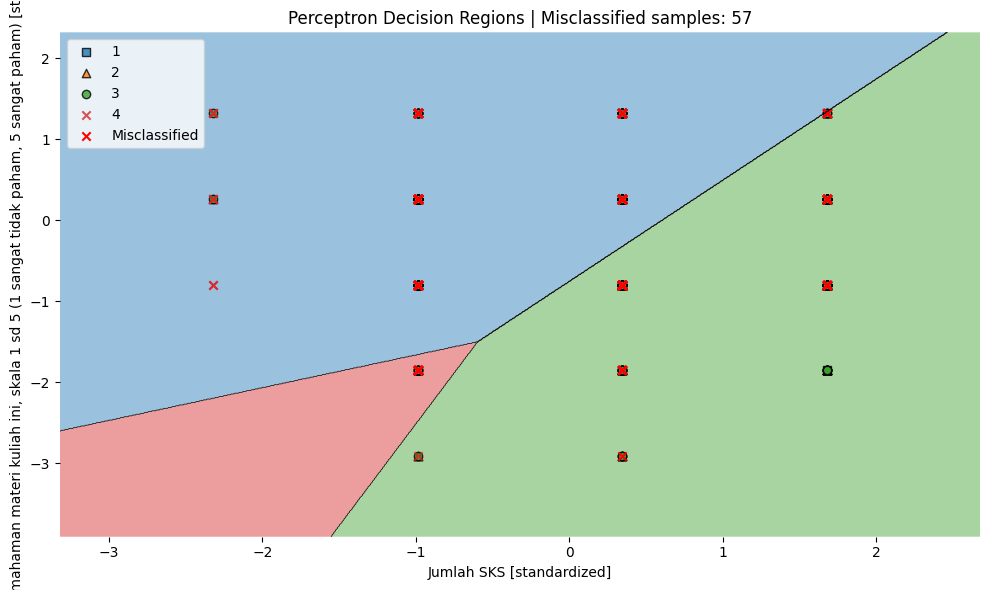

In [ ]:
# ====================== Perceptron ======================
ppn = Perceptron(random_state=42)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

# Accuracy n F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cv_scores = cross_val_score(ppn, X_selected, y, cv=5, scoring='accuracy')

print("\nPerceptron Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f}")

# Hitung misclassified
misclassified_samples_ppn = (y_test != y_pred).sum()
print(f"Misclassified samples: {misclassified_samples_ppn}")

plt.figure(figsize=(10, 6))

plot_decision_regions(X=X_combined_std, y=y_combined, clf=ppn, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Perceptron Decision Regions | Misclassified samples: {misclassified_samples_ppn}')

misclassified_points = X_test_std[y_test != y_pred]
plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**Logistic Regression**


Logistic Regression Results:
Accuracy: 0.6319
F1 Score: 0.5407
5-Fold CV Accuracy: 0.6528
Misclassified samples: 60


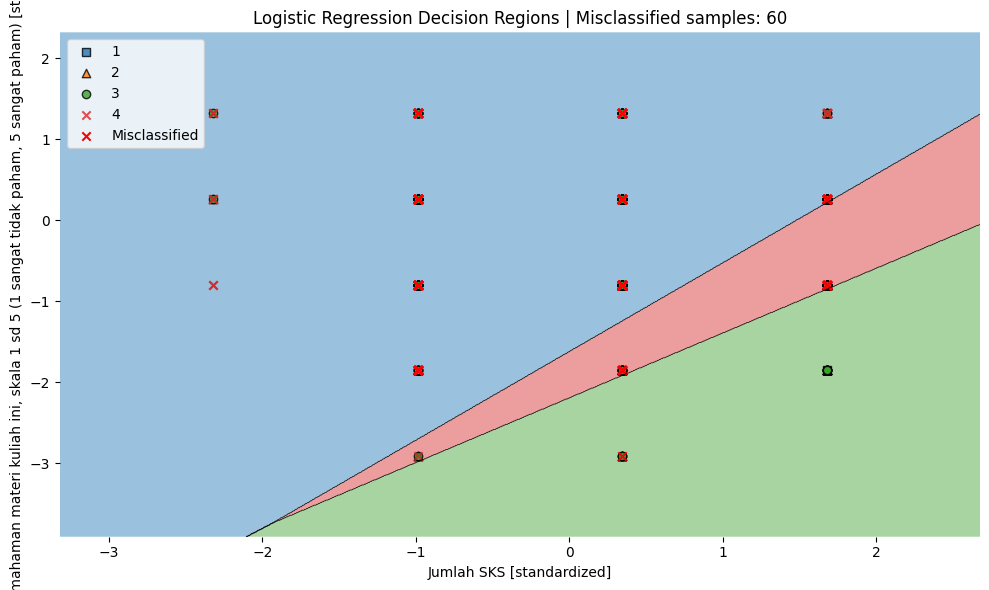

In [ ]:
# ====================== Logistic Regression ======================
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train_std, y_train)
y_pred_lr = clf_lr.predict(X_test_std)

# Accuracy n F1 score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
cv_scores_lr = cross_val_score(clf_lr, X_selected, y, cv=5, scoring='accuracy')

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_lr.mean():.4f}")

# Hitung misclassified
misclassified_samples_lr = (y_test != y_pred_lr).sum()
print(f"Misclassified samples: {misclassified_samples_lr}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_lr, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Logistic Regression Decision Regions | Misclassified samples: {misclassified_samples_lr}')

misclassified_points_lr = X_test_std[y_test != y_pred_lr]
plt.scatter(misclassified_points_lr[:, 0], misclassified_points_lr[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**Linear SVM**


Linear SVM Results:
Accuracy: 0.6380
F1 Score: 0.5475
5-Fold CV Accuracy: 0.6577
Misclassified samples: 59


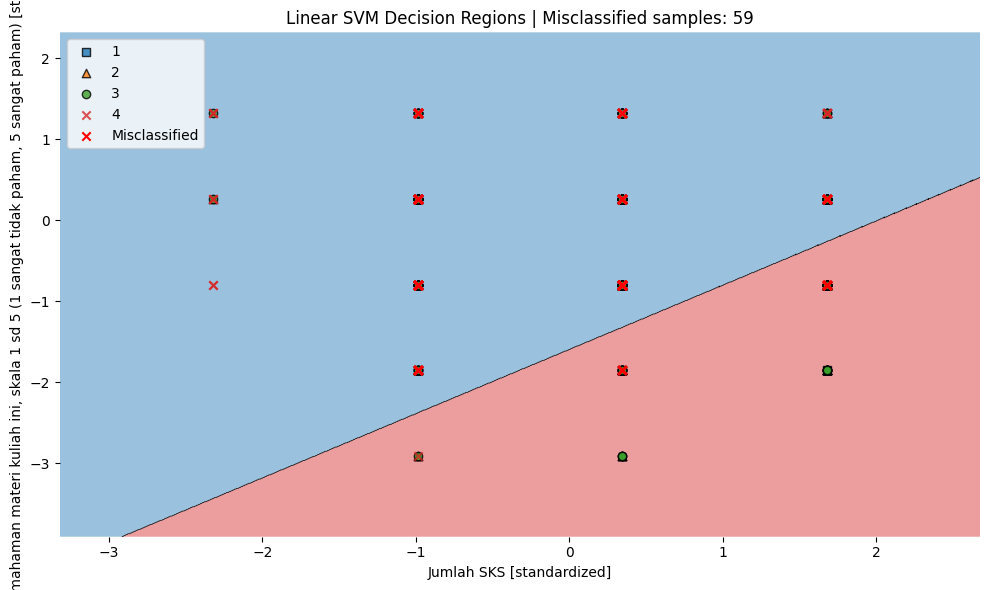

In [ ]:
# ====================== Linear SVM ======================
clf_svm_linear = SVC(kernel='linear', random_state=42)
clf_svm_linear.fit(X_train_std, y_train)
y_pred_svm_linear = clf_svm_linear.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
f1_svm_linear = f1_score(y_test, y_pred_svm_linear, average='weighted')
cv_scores_svm_linear = cross_val_score(clf_svm_linear, X_selected, y, cv=5, scoring='accuracy')

print("\nLinear SVM Results:")
print(f"Accuracy: {accuracy_svm_linear:.4f}")
print(f"F1 Score: {f1_svm_linear:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_linear.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_linear = (y_test != y_pred_svm_linear).sum()
print(f"Misclassified samples: {misclassified_samples_svm_linear}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_linear, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Linear SVM Decision Regions | Misclassified samples: {misclassified_samples_svm_linear}')

misclassified_points_svm_linear = X_test_std[y_test != y_pred_svm_linear]
plt.scatter(misclassified_points_svm_linear[:, 0], misclassified_points_svm_linear[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


###**RBF SVM with gamma = 0.1**


RBF SVM (gamma=0.1) Results:
Accuracy: 0.6319
F1 Score: 0.5407
5-Fold CV Accuracy: 0.6601
Misclassified samples: 60


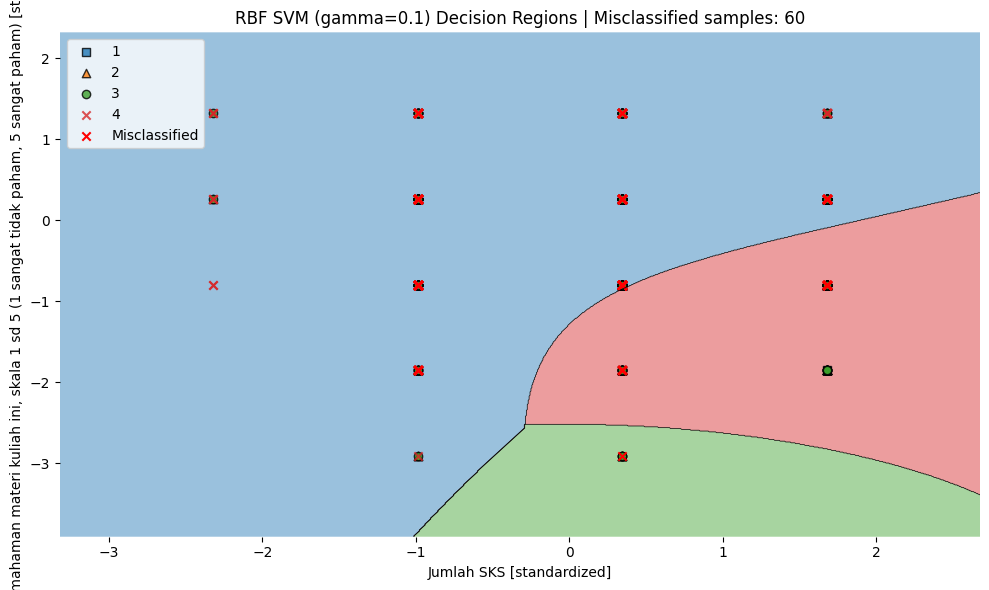

In [ ]:
# ====================== RBF SVM with different gamma values ======================
# RBF SVM with gamma = 0.1
clf_svm_rbf_01 = SVC(kernel='rbf', gamma=0.1, random_state=42)
clf_svm_rbf_01.fit(X_train_std, y_train)
y_pred_svm_rbf_01 = clf_svm_rbf_01.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_rbf_01 = accuracy_score(y_test, y_pred_svm_rbf_01)
f1_svm_rbf_01 = f1_score(y_test, y_pred_svm_rbf_01, average='weighted')
cv_scores_svm_rbf_01 = cross_val_score(clf_svm_rbf_01, X_selected, y, cv=5, scoring='accuracy')

print("\nRBF SVM (gamma=0.1) Results:")
print(f"Accuracy: {accuracy_svm_rbf_01:.4f}")
print(f"F1 Score: {f1_svm_rbf_01:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_rbf_01.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_rbf_01 = (y_test != y_pred_svm_rbf_01).sum()
print(f"Misclassified samples: {misclassified_samples_svm_rbf_01}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_rbf_01, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'RBF SVM (gamma=0.1) Decision Regions | Misclassified samples: {misclassified_samples_svm_rbf_01}')

misclassified_points_svm_rbf_01 = X_test_std[y_test != y_pred_svm_rbf_01]
plt.scatter(misclassified_points_svm_rbf_01[:, 0], misclassified_points_svm_rbf_01[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


####**RBF SVM with gamma = 1**


RBF SVM (gamma=1) Results:
Accuracy: 0.6503
F1 Score: 0.6072
5-Fold CV Accuracy: 0.6564
Misclassified samples: 57


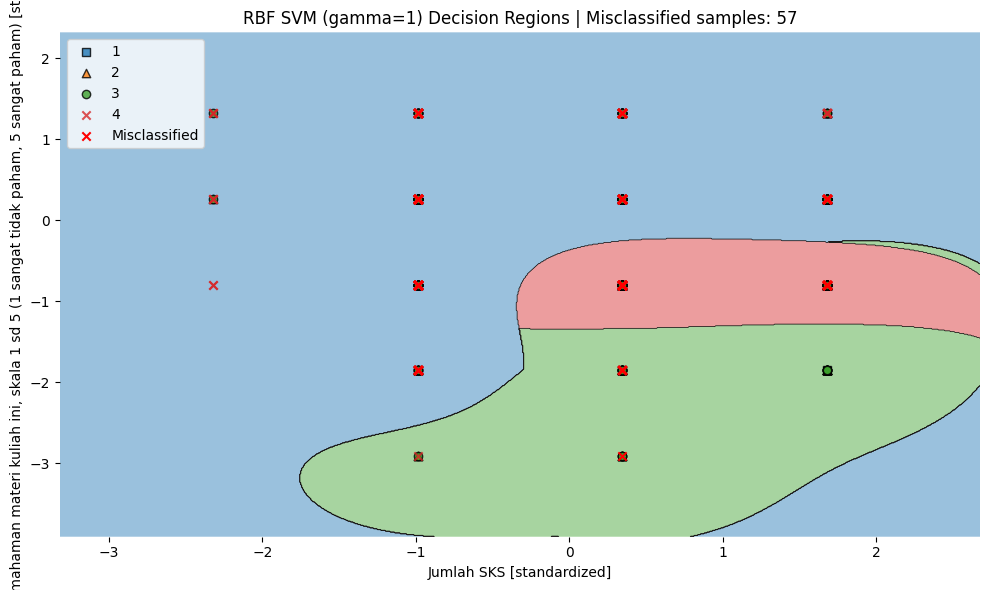

In [ ]:
# ====================== RBF SVM with different gamma values ======================
# RBF SVM with gamma = 1
clf_svm_rbf_1 = SVC(kernel='rbf', gamma=1, random_state=42)
clf_svm_rbf_1.fit(X_train_std, y_train)
y_pred_svm_rbf_1 = clf_svm_rbf_1.predict(X_test_std)

# Accuracy n F1 score
accuracy_svm_rbf_1 = accuracy_score(y_test, y_pred_svm_rbf_1)
f1_svm_rbf_1 = f1_score(y_test, y_pred_svm_rbf_1, average='weighted')
cv_scores_svm_rbf_1 = cross_val_score(clf_svm_rbf_1, X_selected, y, cv=5, scoring='accuracy')

print("\nRBF SVM (gamma=1) Results:")
print(f"Accuracy: {accuracy_svm_rbf_1:.4f}")
print(f"F1 Score: {f1_svm_rbf_1:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_svm_rbf_1.mean():.4f}")

# Hitung misclassification
misclassified_samples_svm_rbf_1 = (y_test != y_pred_svm_rbf_1).sum()
print(f"Misclassified samples: {misclassified_samples_svm_rbf_1}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_svm_rbf_1, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'RBF SVM (gamma=1) Decision Regions | Misclassified samples: {misclassified_samples_svm_rbf_1}')

misclassified_points_svm_rbf_1 = X_test_std[y_test != y_pred_svm_rbf_1]
plt.scatter(misclassified_points_svm_rbf_1[:, 0], misclassified_points_svm_rbf_1[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**Decision Tree**


Decision Tree Results:
Accuracy: 0.6503
F1 Score: 0.6072
5-Fold CV Accuracy: 0.6528
Misclassified samples: 57


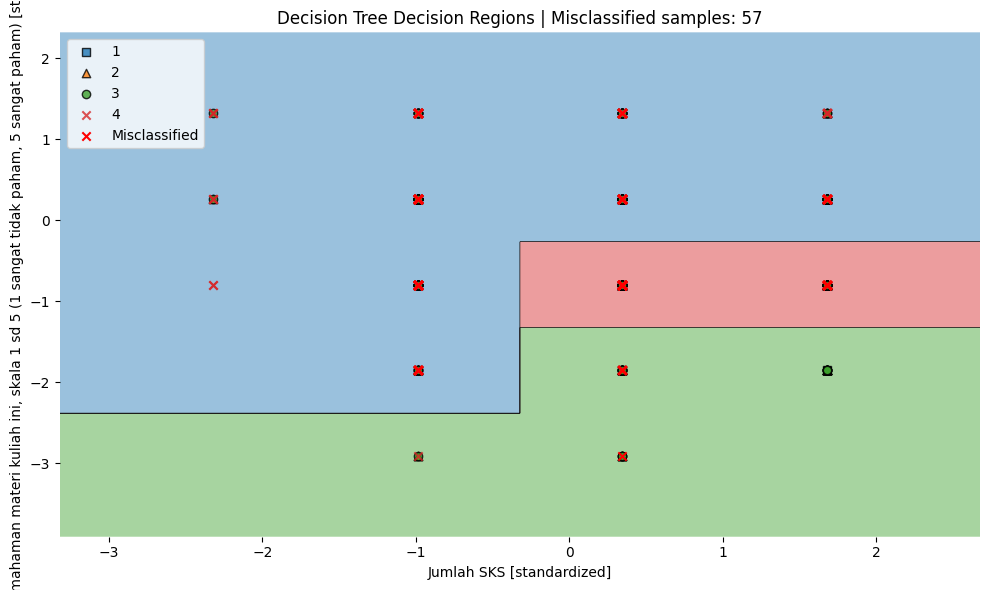

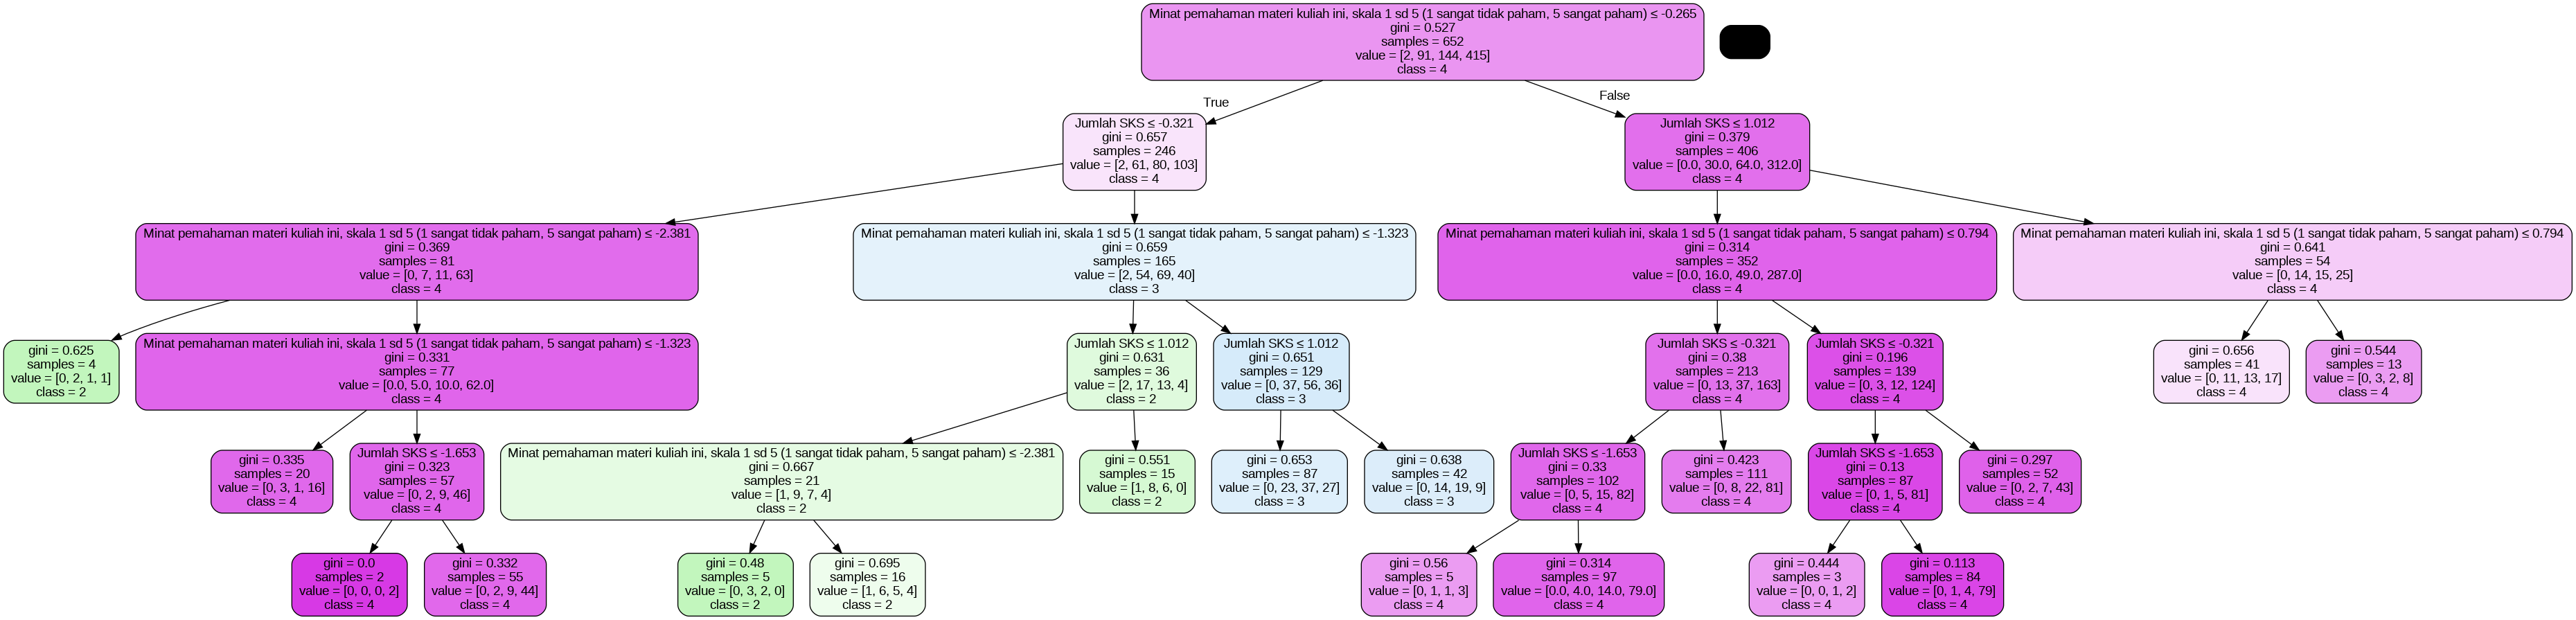

In [ ]:
# ====================== Decision Tree ======================
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydotplus

# ====================== Decision Tree Visualization ======================

# Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train_std, y_train)
y_pred_tree = clf_tree.predict(X_test_std)

# Accuracy and F1 score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
cv_scores_tree = cross_val_score(clf_tree, X_selected, y, cv=5, scoring='accuracy')

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_tree.mean():.4f}")

# Hitung misclassification
misclassified_samples_tree = (y_test != y_pred_tree).sum()
print(f"Misclassified samples: {misclassified_samples_tree}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_tree, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Decision Tree Decision Regions | Misclassified samples: {misclassified_samples_tree}')

misclassified_points_tree = X_test_std[y_test != y_pred_tree]
plt.scatter(misclassified_points_tree[:, 0], misclassified_points_tree[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Visualizing decision tree
try:
    dot_data = export_graphviz(
        clf_tree,
        out_file=None,
        feature_names=top_features,
        class_names=[str(i) for i in np.unique(y)],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = pydotplus.graph_from_dot_data(dot_data)

    display(Image(graph.create_png()))

except ImportError:
    print('pydotplus is not installed.')


####**Random Forest**


Random Forest Results:
Accuracy: 0.6503
F1 Score: 0.6072
5-Fold CV Accuracy: 0.6564
Misclassified samples: 57


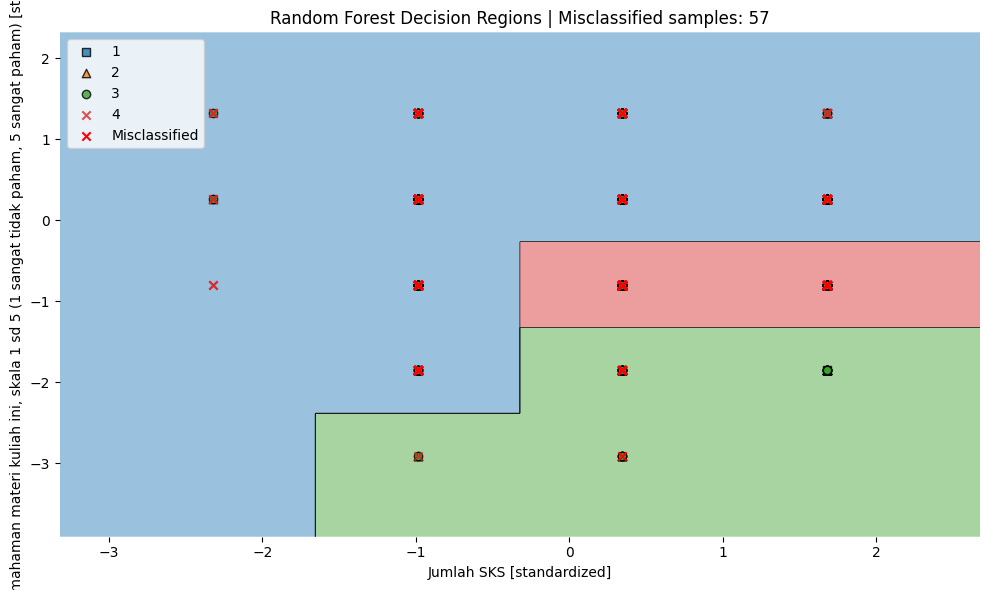

In [ ]:
# ====================== Random Forest ======================
# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_std, y_train)
y_pred_rf = clf_rf.predict(X_test_std)

# Accuracy and F1 score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cv_scores_rf = cross_val_score(clf_rf, X_selected, y, cv=5, scoring='accuracy')

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_rf.mean():.4f}")

# Hitung misclassification
misclassified_samples_rf = (y_test != y_pred_rf).sum()
print(f"Misclassified samples: {misclassified_samples_rf}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_rf, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'Random Forest Decision Regions | Misclassified samples: {misclassified_samples_rf}')

misclassified_points_rf = X_test_std[y_test != y_pred_rf]
plt.scatter(misclassified_points_rf[:, 0], misclassified_points_rf[:, 1], color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**K-Nearest Neighbors (KNN)**


K-Nearest Neighbors (KNN) Results:
Accuracy: 0.6319
F1 Score: 0.5954
5-Fold CV Accuracy: 0.6012
Misclassified samples: 60


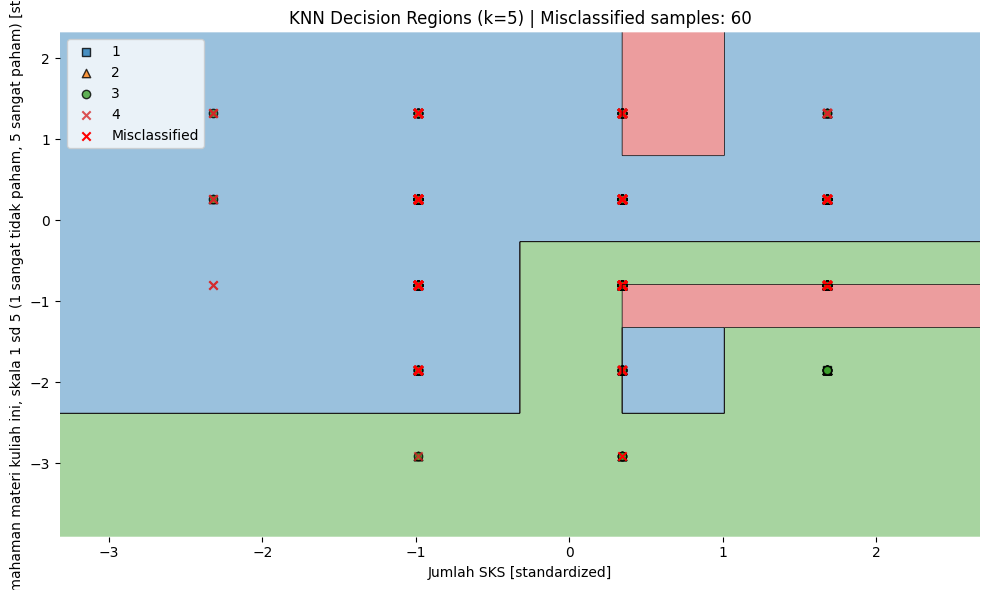

In [ ]:
# ====================== K-Nearest Neighbors (KNN) ======================
clf_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa tuning nilai k
clf_knn.fit(X_train_std, y_train)
y_pred_knn = clf_knn.predict(X_test_std)

# Accuracy n F1 score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
cv_scores_knn = cross_val_score(clf_knn, X_selected, y, cv=5, scoring='accuracy')

print("\nK-Nearest Neighbors (KNN) Results:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"5-Fold CV Accuracy: {cv_scores_knn.mean():.4f}")

# Hitung misclassification
misclassified_samples_knn = (y_test != y_pred_knn).sum()
print(f"Misclassified samples: {misclassified_samples_knn}")

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_combined_std, y=y_combined, clf=clf_knn, legend=2)
plt.xlabel(f'{top_features[0]} [standardized]')
plt.ylabel(f'{top_features[1]} [standardized]')
plt.title(f'KNN Decision Regions (k=5) | Misclassified samples: {misclassified_samples_knn}')

misclassified_points_knn = X_test_std[y_test != y_pred_knn]
plt.scatter(misclassified_points_knn[:, 0], misclassified_points_knn[:, 1],
            color='red', marker='x', label='Misclassified')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

####**Analisis dan Perbandingan Model**


Model Comparison:


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
0           Perceptron  0.650307  0.627036            0.592638   
1  Logistic Regression  0.631902  0.540723            0.652761   
2           Linear SVM  0.638037  0.547527            0.657669   
3  RBF SVM (gamma=0.1)  0.631902  0.540723            0.660123   
4    RBF SVM (gamma=1)  0.650307  0.607211            0.656442   
5        Decision Tree  0.650307  0.607211            0.652761   
6        Random Forest  0.650307  0.607211            0.656442   
7                  KNN  0.631902  0.595365            0.601227   

   Misclassified Samples  
0                     57  
1                     60  
2                     59  
3                     60  
4                     57  
5                     57  
6                     57  
7                     60


Model Comparison (Sorted by Accuracy):


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
0           Perceptron  0.650307  0.627036            0.592638   
6        Random Forest  0.650307  0.607211            0.656442   
5        Decision Tree  0.650307  0.607211            0.652761   
4    RBF SVM (gamma=1)  0.650307  0.607211            0.656442   
2           Linear SVM  0.638037  0.547527            0.657669   
1  Logistic Regression  0.631902  0.540723            0.652761   
3  RBF SVM (gamma=0.1)  0.631902  0.540723            0.660123   
7                  KNN  0.631902  0.595365            0.601227   

   Misclassified Samples  
0                     57  
6                     57  
5                     57  
4                     57  
2                     59  
1                     60  
3                     60  
7                     60

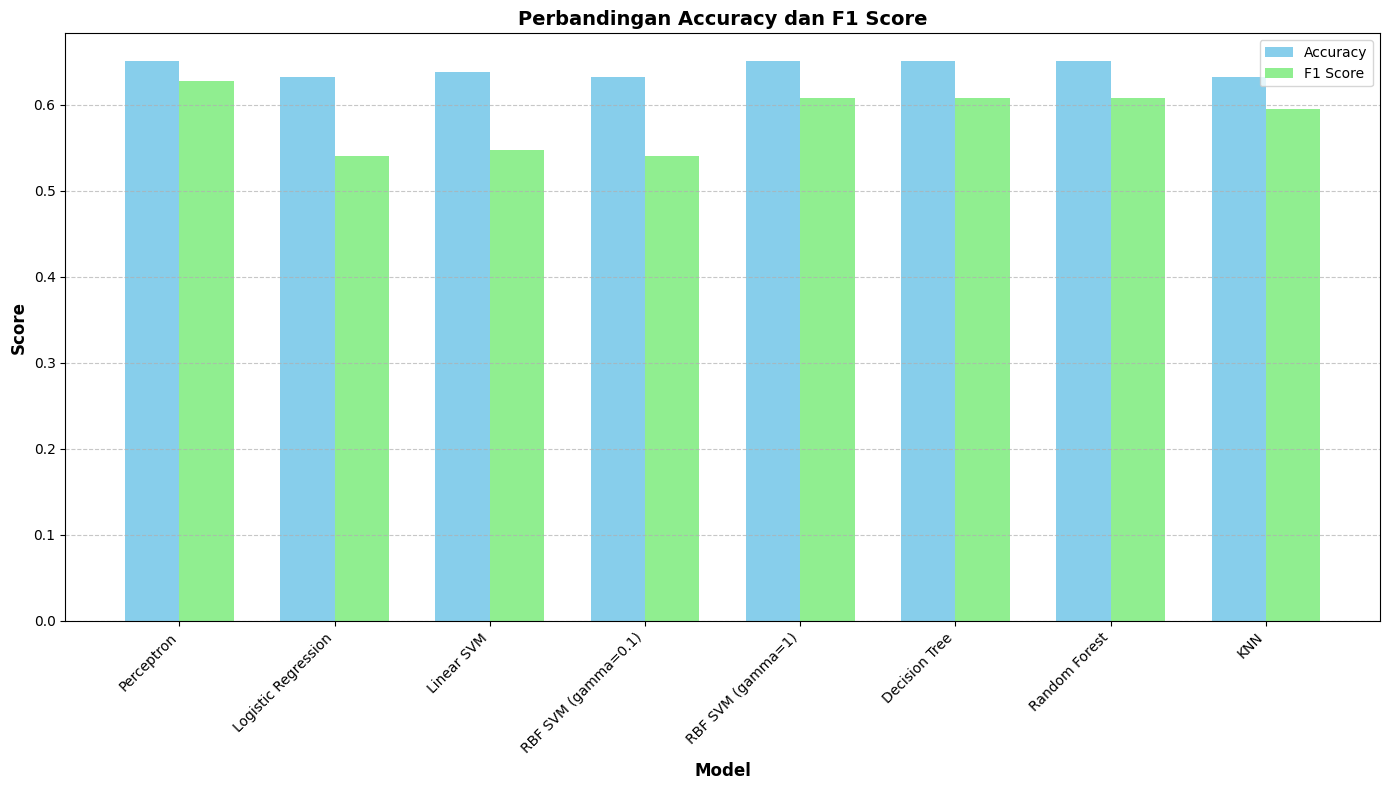

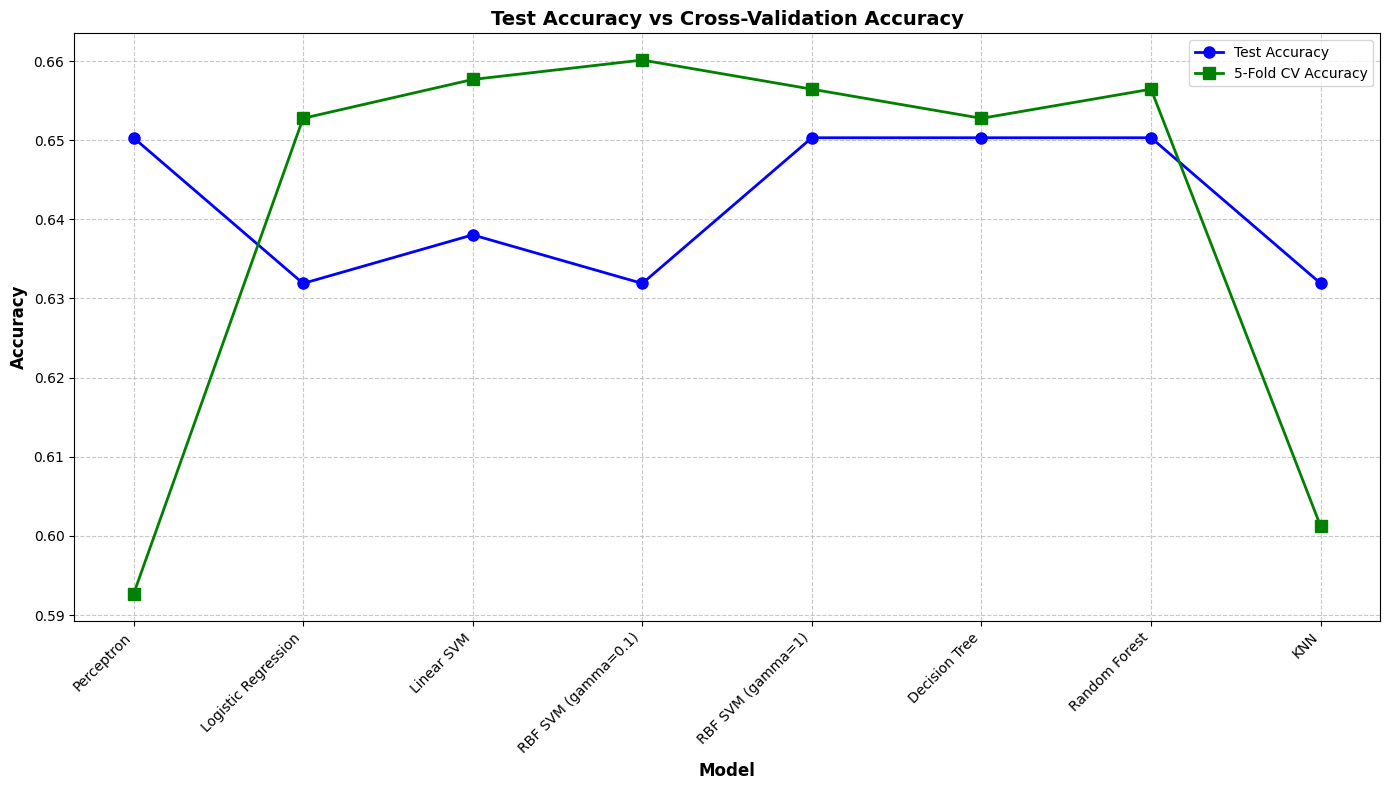

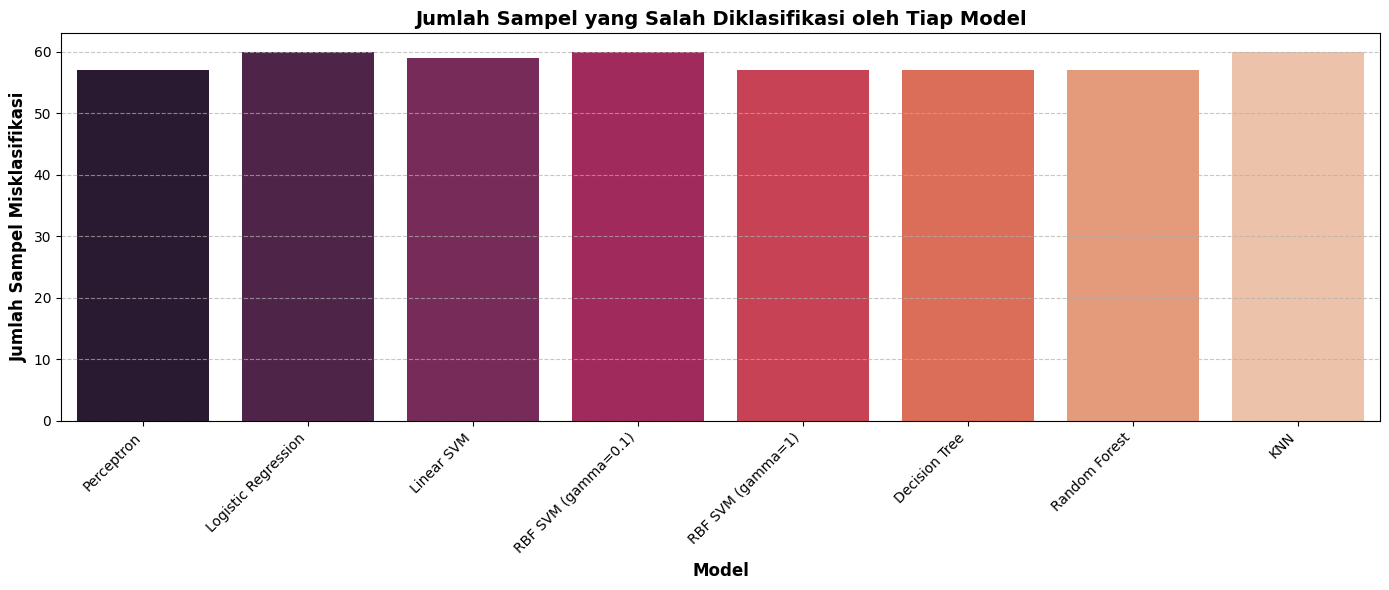

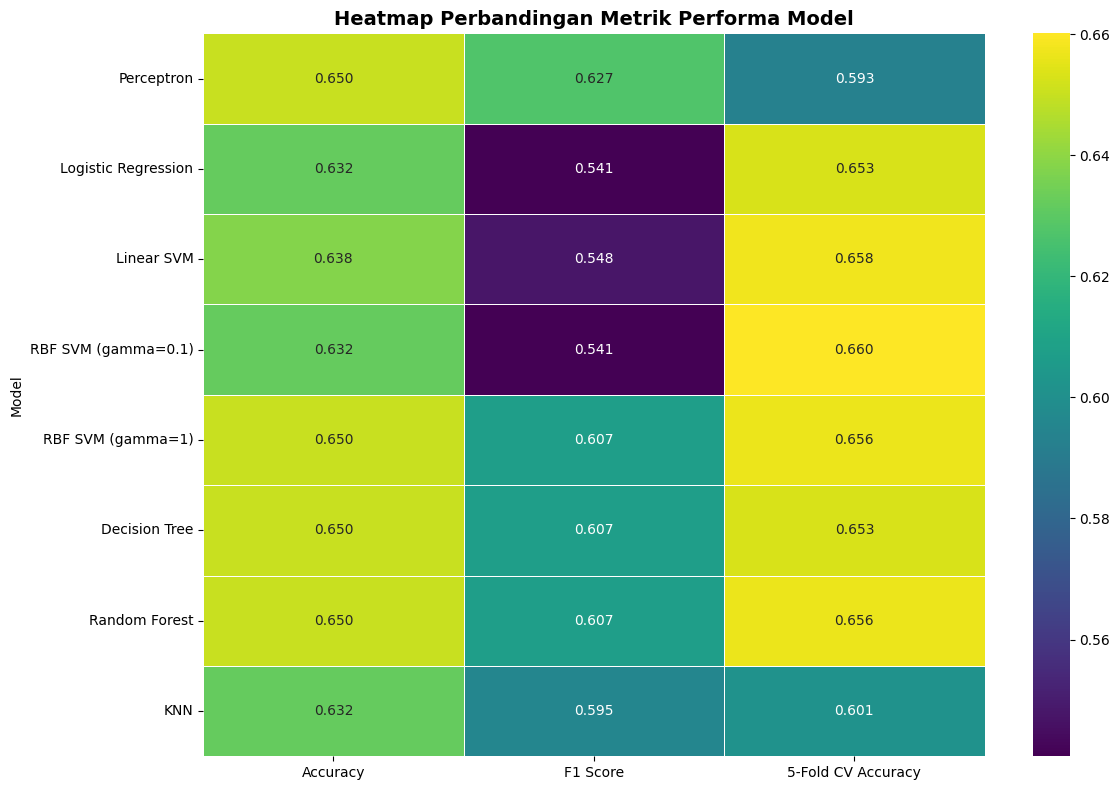

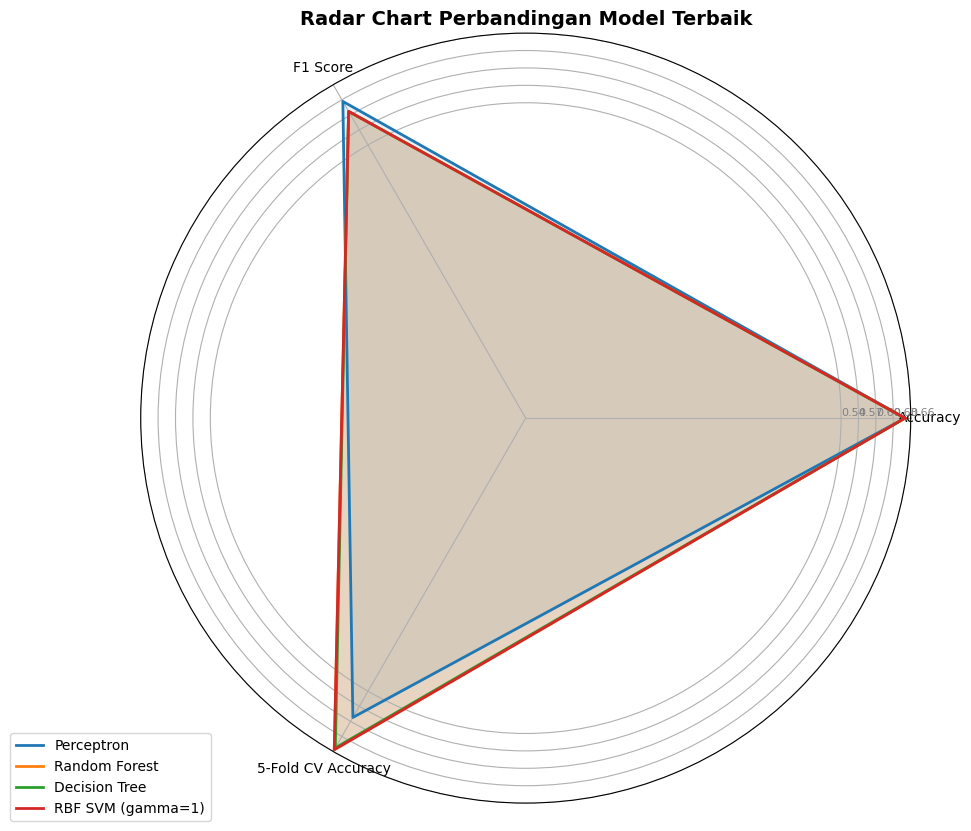

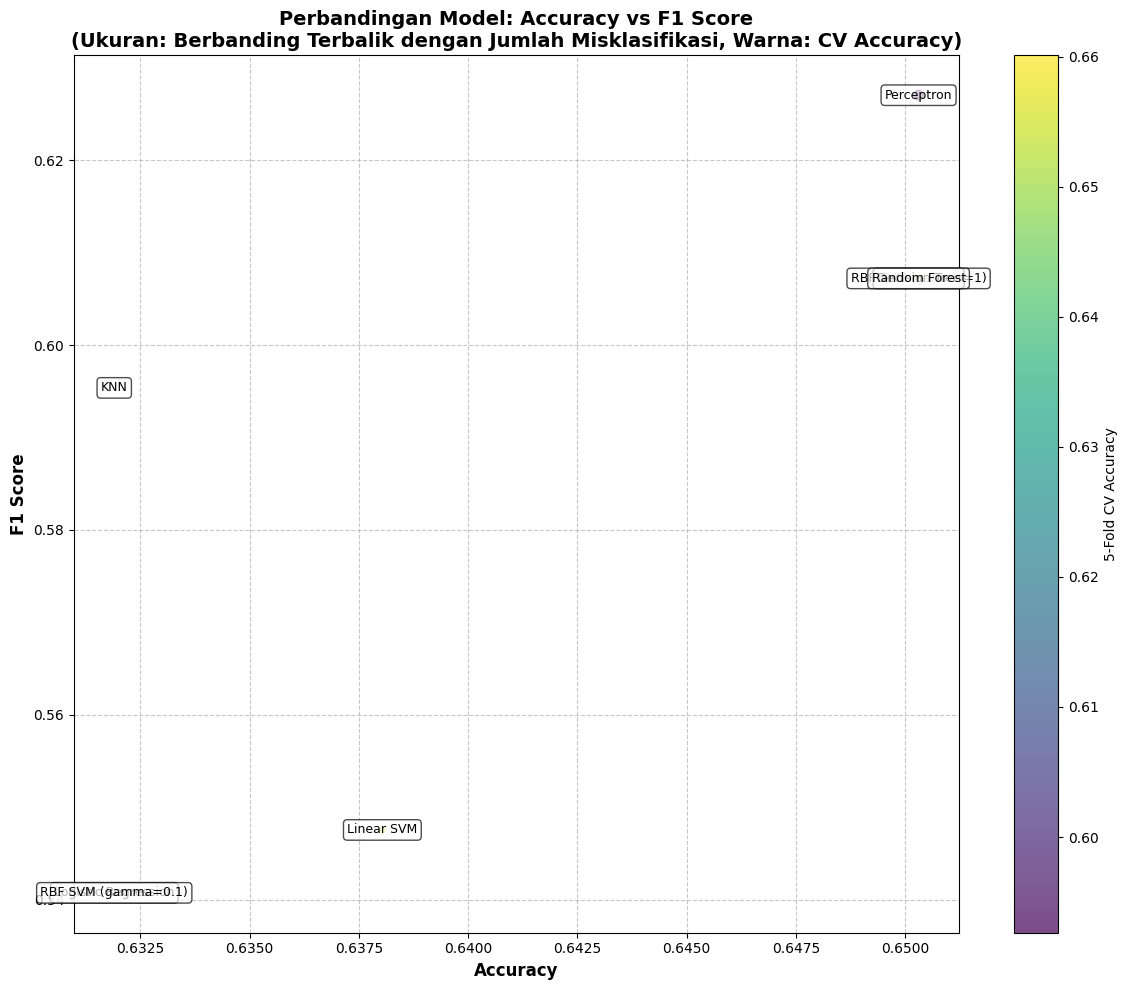

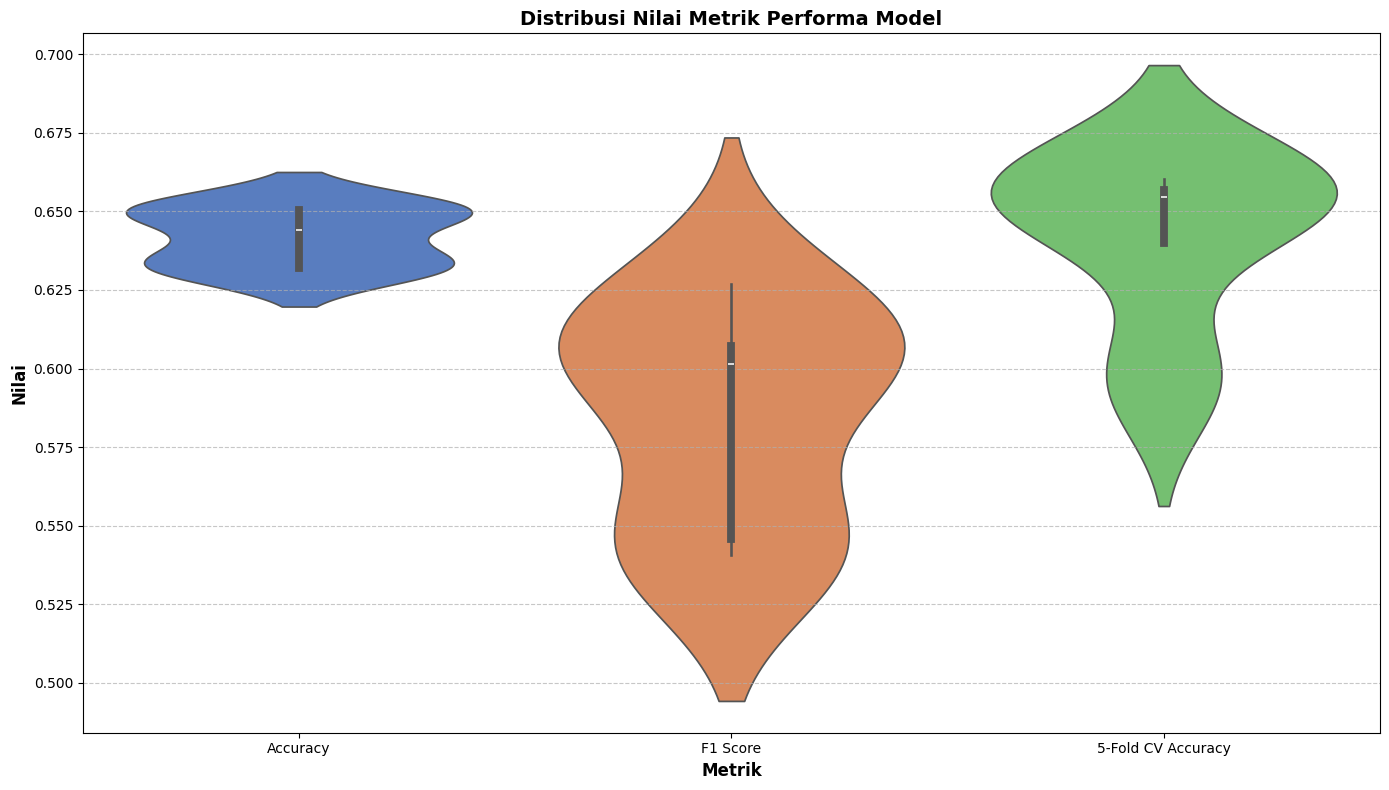

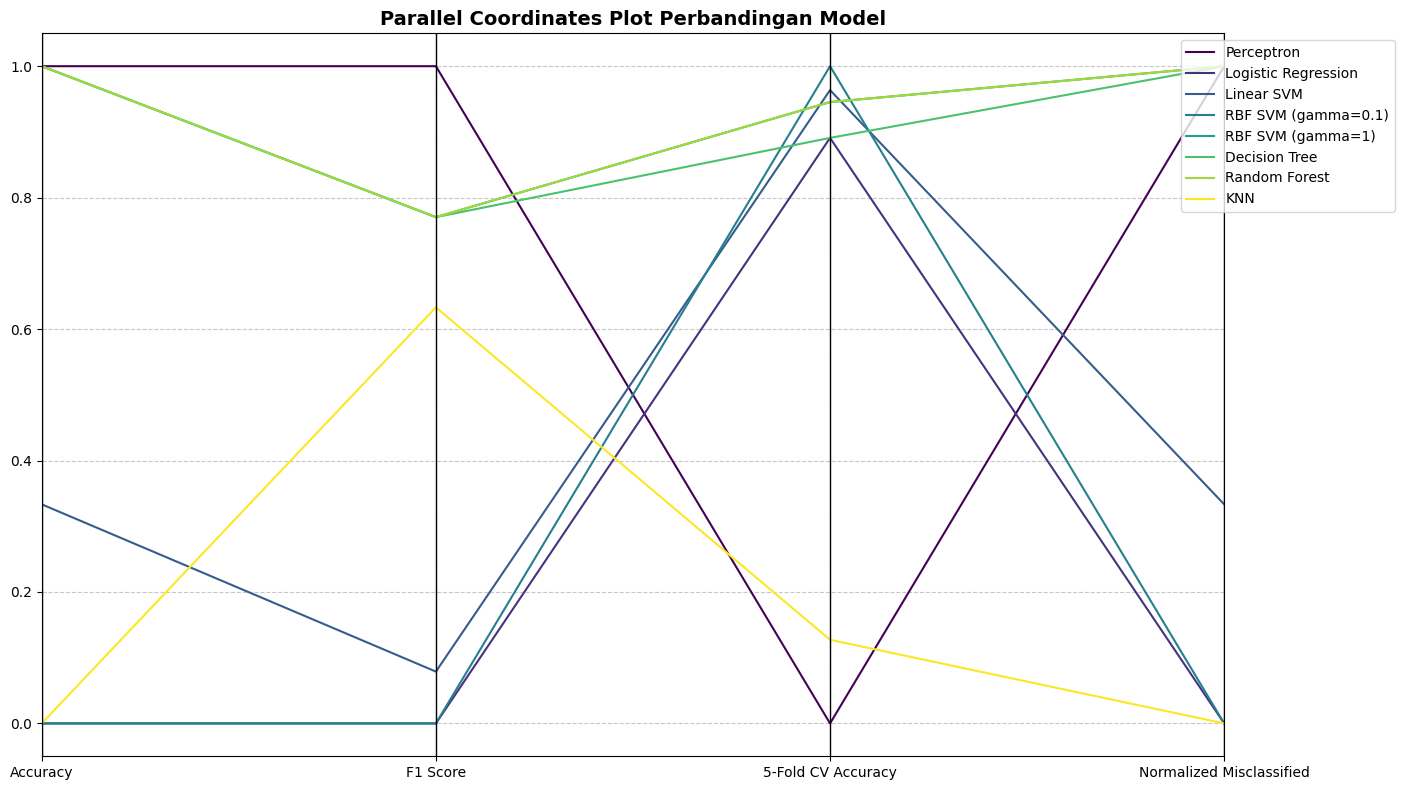


Model terbaik berdasarkan akurasi: Perceptron dengan akurasi 0.6503
Model terbaik berdasarkan F1 Score: Perceptron dengan F1 Score 0.6270
Model terbaik berdasarkan cross-validation: RBF SVM (gamma=0.1) dengan CV Accuracy 0.6601
Model dengan jumlah kesalahan klasifikasi terendah: Perceptron dengan 57 sampel salah klasifikasi

Peringkat Keseluruhan Model (berdasarkan gabungan semua metrik):


Model  Accuracy  F1 Score  5-Fold CV Accuracy  \
6        Random Forest  0.650307  0.607211            0.656442   
4    RBF SVM (gamma=1)  0.650307  0.607211            0.656442   
5        Decision Tree  0.650307  0.607211            0.652761   
0           Perceptron  0.650307  0.627036            0.592638   
2           Linear SVM  0.638037  0.547527            0.657669   
3  RBF SVM (gamma=0.1)  0.631902  0.540723            0.660123   
7                  KNN  0.631902  0.595365            0.601227   
1  Logistic Regression  0.631902  0.540723            0.652761   

   Misclassified Samples  Accuracy Rank  F1 Rank  CV Rank  Misclassified Rank  \
6                     57            2.5      3.0      3.5                 2.5   
4                     57            2.5      3.0      3.5                 2.5   
5                     57            2.5      3.0      5.5                 2.5   
0                     57            2.5      1.0      8.0                 2.5   
2                     59            5.0      6.0      2.0                 5.0   
3                     60            7.0      7.5      1.0                 7.0   
7                     60            7.0      5.0      7.0                 7.0   
1                     60            7.0      7.5      5.5                 7.0   

   Overall Rank  
6         2.875  
4         2.875  
5         3.375  
0         3.500  
2         4.500  
3         5.625  
7         6.500  
1         6.750


Model terbaik secara keseluruhan: RBF SVM (gamma=1)

Rekomendasi Final:
Berdasarkan analisis komprehensif, model RBF SVM (gamma=1) menunjukkan performa terbaik secara keseluruhan.
Model ini memberikan keseimbangan optimal antara akurasi prediksi, F1 score, stabilitas cross-validation, dan minimalisasi kesalahan klasifikasi.


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Perceptron', 'Logistic Regression', 'Linear SVM', 'RBF SVM (gamma=0.1)',
              'RBF SVM (gamma=1)', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy, accuracy_lr, accuracy_svm_linear, accuracy_svm_rbf_01,
                accuracy_svm_rbf_1, accuracy_tree, accuracy_rf, accuracy_knn],
    'F1 Score': [f1, f1_lr, f1_svm_linear, f1_svm_rbf_01,
                f1_svm_rbf_1, f1_tree, f1_rf, f1_knn],
    '5-Fold CV Accuracy': [cv_scores.mean(), cv_scores_lr.mean(), cv_scores_svm_linear.mean(),
                          cv_scores_svm_rbf_01.mean(), cv_scores_svm_rbf_1.mean(),
                          cv_scores_tree.mean(), cv_scores_rf.mean(), cv_scores_knn.mean()],
    'Misclassified Samples': [misclassified_samples_ppn, misclassified_samples_lr,
                             misclassified_samples_svm_linear, misclassified_samples_svm_rbf_01,
                             misclassified_samples_svm_rbf_1, misclassified_samples_tree,
                             misclassified_samples_rf, misclassified_samples_knn]
})

# Menampilkan tabel hasil
print("\nModel Comparison:")
display(results_df)

# Menampilkan model yang diurutkan berdasarkan akurasi
print("\nModel Comparison (Sorted by Accuracy):")
display(results_df.sort_values(by='Accuracy', ascending=False))

# 1. Visualisasi perbandingan akurasi dan F1 Score
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(results_df['Model']))

plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, results_df['F1 Score'], bar_width, label='F1 Score', color='lightgreen')

plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Score', fontweight='bold', fontsize=12)
plt.title('Perbandingan Accuracy dan F1 Score', fontweight='bold', fontsize=14)
plt.xticks(index + bar_width / 2, results_df['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Visualisasi CV Accuracy vs Test Accuracy
plt.figure(figsize=(14, 8))
models = results_df['Model']
test_acc = results_df['Accuracy']
cv_acc = results_df['5-Fold CV Accuracy']

plt.plot(models, test_acc, 'o-', label='Test Accuracy', markersize=8, linewidth=2, color='blue')
plt.plot(models, cv_acc, 's-', label='5-Fold CV Accuracy', markersize=8, linewidth=2, color='green')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('Test Accuracy vs Cross-Validation Accuracy', fontweight='bold', fontsize=14)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualisasi jumlah sampel yang salah klasifikasi
plt.figure(figsize=(14, 6))
sns.barplot(x='Model', y='Misclassified Samples', data=results_df, palette='rocket')
plt.xlabel('Model', fontweight='bold', fontsize=12)
plt.ylabel('Jumlah Sampel Misklasifikasi', fontweight='bold', fontsize=12)
plt.title('Jumlah Sampel yang Salah Diklasifikasi oleh Tiap Model', fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Heatmap perbandingan metrik
plt.figure(figsize=(12, 8))
heatmap_data = results_df.set_index('Model')
heatmap_data = heatmap_data.drop('Misclassified Samples', axis=1)  # Remove for better color scaling
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', linewidths=.5)
plt.title('Heatmap Perbandingan Metrik Performa Model', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Radar chart untuk perbandingan model terbaik
# Pilih beberapa model terbaik untuk perbandingan
top_models = results_df.sort_values(by='Accuracy', ascending=False).head(4)

# Persiapan data untuk radar chart
categories = ['Accuracy', 'F1 Score', '5-Fold CV Accuracy']
N = len(categories)

# Buat sudut untuk setiap kategori
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Tambahkan plotting untuk tiap model
for i, model in enumerate(top_models['Model']):
    row_idx = top_models.index[i]
    values = top_models.loc[row_idx, categories].tolist()
    values += values[:1]  # Close the loop

    plt.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    plt.fill(angles, values, alpha=0.1)

# Customize radar chart
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
# Menentukan nilai ticks berdasarkan range data aktual
y_ticks = np.linspace(min(results_df[categories].min()), max(results_df[categories].max()), 5)
plt.yticks(y_ticks, [f'{x:.2f}' for x in y_ticks], color="grey", size=8)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart Perbandingan Model Terbaik', fontweight='bold', fontsize=14)
plt.grid(True)
plt.show()

# 6. Visualisasi perbandingan model dengan scatter plot
plt.figure(figsize=(12, 10))
plt.scatter(results_df['Accuracy'], results_df['F1 Score'],
            s=1000*(1-results_df['Misclassified Samples']/results_df['Misclassified Samples'].max()),
            alpha=0.7, c=results_df['5-Fold CV Accuracy'], cmap='viridis')

# Tambahkan label untuk setiap titik
for i, model in enumerate(results_df['Model']):
    plt.annotate(model, (results_df['Accuracy'][i], results_df['F1 Score'][i]),
                fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Accuracy', fontweight='bold', fontsize=12)
plt.ylabel('F1 Score', fontweight='bold', fontsize=12)
plt.title('Perbandingan Model: Accuracy vs F1 Score\n(Ukuran: Berbanding Terbalik dengan Jumlah Misklasifikasi, Warna: CV Accuracy)',
         fontweight='bold', fontsize=14)
plt.colorbar(label='5-Fold CV Accuracy')
plt.tight_layout()
plt.show()

# 7. Visualisasi distribusi metrik dengan violin plot
metrics_melted = pd.melt(results_df, id_vars=['Model'], value_vars=['Accuracy', 'F1 Score', '5-Fold CV Accuracy'],
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.violinplot(x='Metric', y='Value', data=metrics_melted, palette='muted')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Metrik', fontweight='bold', fontsize=12)
plt.ylabel('Nilai', fontweight='bold', fontsize=12)
plt.title('Distribusi Nilai Metrik Performa Model', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# 8. Visualisasi dengan Parallel Coordinates Plot
plt.figure(figsize=(14, 8))
# Menormalisasi data untuk plot parallel coordinates
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
plot_data = results_df.copy()
plot_data['Normalized Misclassified'] = 1 - scaler.fit_transform(plot_data[['Misclassified Samples']])
plot_columns = ['Accuracy', 'F1 Score', '5-Fold CV Accuracy', 'Normalized Misclassified']
normalized_data = pd.DataFrame(scaler.fit_transform(plot_data[plot_columns]), columns=plot_columns)
normalized_data['Model'] = plot_data['Model']

# Plot parallel coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(normalized_data, 'Model', colormap='viridis')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Parallel Coordinates Plot Perbandingan Model', fontweight='bold', fontsize=14)
plt.xticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

# Analisis dan kesimpulan
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\nModel terbaik berdasarkan akurasi: {best_model['Model']} dengan akurasi {best_model['Accuracy']:.4f}")

best_f1 = results_df.loc[results_df['F1 Score'].idxmax()]
print(f"Model terbaik berdasarkan F1 Score: {best_f1['Model']} dengan F1 Score {best_f1['F1 Score']:.4f}")

best_cv = results_df.loc[results_df['5-Fold CV Accuracy'].idxmax()]
print(f"Model terbaik berdasarkan cross-validation: {best_cv['Model']} dengan CV Accuracy {best_cv['5-Fold CV Accuracy']:.4f}")

best_misclassified = results_df.loc[results_df['Misclassified Samples'].idxmin()]
print(f"Model dengan jumlah kesalahan klasifikasi terendah: {best_misclassified['Model']} dengan {best_misclassified['Misclassified Samples']} sampel salah klasifikasi")

# Menghitung skor gabungan berdasarkan peringkat
results_df['Accuracy Rank'] = results_df['Accuracy'].rank(ascending=False)
results_df['F1 Rank'] = results_df['F1 Score'].rank(ascending=False)
results_df['CV Rank'] = results_df['5-Fold CV Accuracy'].rank(ascending=False)
results_df['Misclassified Rank'] = results_df['Misclassified Samples'].rank()

results_df['Overall Rank'] = (results_df['Accuracy Rank'] + results_df['F1 Rank'] +
                              results_df['CV Rank'] + results_df['Misclassified Rank']) / 4

print("\nPeringkat Keseluruhan Model (berdasarkan gabungan semua metrik):")
display(results_df.sort_values(by='Overall Rank'))

overall_best = results_df.loc[results_df['Overall Rank'].idxmin()]
print(f"\nModel terbaik secara keseluruhan: {overall_best['Model']}")

print("\nRekomendasi Final:")
print(f"Berdasarkan analisis komprehensif, model {overall_best['Model']} menunjukkan performa terbaik secara keseluruhan.")
print("Model ini memberikan keseimbangan optimal antara akurasi prediksi, F1 score, stabilitas cross-validation, dan minimalisasi kesalahan klasifikasi.")